# **Proyecto Inteligencia Computacional EL4106**
## Avance 
### María José Liberona T. 

In [1]:
#Librerías 
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, PredefinedSplit
from sklearn.model_selection import GridSearchCV
from scipy.stats import kurtosis, iqr, entropy
from scipy import signal
from torch.utils.data import random_split
import torch
import torch.nn as nn
import csv
import time
import sys
import math

In [2]:
#Subir archivo comprimido

from google.colab import files
uploaded = files.upload()  # Dataset_proyecto.zip

uploaded_random=files.upload()  # archivo_random.csv
uploaded_random_SFM=files.upload()  # archivo_random_SFM.csv
uploaded_random_K=files.upload()  # archivo_random_K.csv
uploaded_red=files.upload()  # archivo_red.csv
uploaded_red2=files.upload() #archivo_red_2.csva



Saving Dataset_proyecto.zip to Dataset_proyecto.zip


Saving archivo_random.csv to archivo_random.csv


Saving archivo_random_K.csv to archivo_random_K.csv


Saving archivo_random_SFM.csv to archivo_random_SFM.csv


Saving archivo_red.csv to archivo_red.csv


Saving archivo_red_2.csv to archivo_red_2.csv


In [3]:
!unzip Dataset_proyecto.zip #Descomprime el archivo zip

Archive:  Dataset_proyecto.zip
  inflating: body_acc_x_entrenamiento.csv  
  inflating: body_acc_x_prueba.csv   
  inflating: body_acc_x_validacion.csv  
  inflating: body_acc_y_entrenamiento.csv  
  inflating: body_acc_y_prueba.csv   
  inflating: body_acc_y_validacion.csv  
  inflating: body_acc_z_entrenamiento.csv  
  inflating: body_acc_z_prueba.csv   
  inflating: body_acc_z_validacion.csv  
  inflating: body_gyro_x_entrenamiento.csv  
  inflating: body_gyro_x_prueba.csv  
  inflating: body_gyro_x_validacion.csv  
  inflating: body_gyro_y_entrenamiento.csv  
  inflating: body_gyro_y_prueba.csv  
  inflating: body_gyro_y_validacion.csv  
  inflating: body_gyro_z_entrenamiento.csv  
  inflating: body_gyro_z_prueba.csv  
  inflating: body_gyro_z_validacion.csv  
  inflating: total_acc_x_entrenamiento.csv  
  inflating: total_acc_x_prueba.csv  
  inflating: total_acc_x_validacion.csv  
  inflating: total_acc_y_entrenamiento.csv  
  inflating: total_acc_y_prueba.csv  
  inflating: tota

In [4]:
#Leer archivos en pd.Dataframe

#Archivos de entrenamiento (train)
#Body Acc
body_acc_x_train=pd.read_csv('body_acc_x_entrenamiento.csv')
body_acc_y_train=pd.read_csv('body_acc_y_entrenamiento.csv')
body_acc_z_train=pd.read_csv('body_acc_z_entrenamiento.csv')
#Body Gyro
body_gyro_x_train=pd.read_csv('body_gyro_x_entrenamiento.csv')
body_gyro_y_train=pd.read_csv('body_gyro_y_entrenamiento.csv')
body_gyro_z_train=pd.read_csv('body_gyro_z_entrenamiento.csv')
#Total Acc
total_acc_x_train=pd.read_csv('total_acc_x_entrenamiento.csv')
total_acc_y_train=pd.read_csv('total_acc_y_entrenamiento.csv')
total_acc_z_train=pd.read_csv('total_acc_z_entrenamiento.csv')
#Labels
labels_train=pd.read_csv('y_entrenamiento.csv')['Category']

#Archivos de validación (val)
#Body Acc
body_acc_x_val=pd.read_csv('body_acc_x_validacion.csv')
body_acc_y_val=pd.read_csv('body_acc_y_validacion.csv')
body_acc_z_val=pd.read_csv('body_acc_z_validacion.csv')
#Body Gyro
body_gyro_x_val=pd.read_csv('body_gyro_x_validacion.csv')
body_gyro_y_val=pd.read_csv('body_gyro_y_validacion.csv')
body_gyro_z_val=pd.read_csv('body_gyro_z_validacion.csv')
#Total Acc
total_acc_x_val=pd.read_csv('total_acc_x_validacion.csv')
total_acc_y_val=pd.read_csv('total_acc_y_validacion.csv')
total_acc_z_val=pd.read_csv('total_acc_z_validacion.csv')
#Labels
labels_val=pd.read_csv('y_validacion.csv')['Category']

#Archivos de prueba (test)
#Body Acc
body_acc_x_test=pd.read_csv('body_acc_x_prueba.csv')
body_acc_y_test=pd.read_csv('body_acc_y_prueba.csv')
body_acc_z_test=pd.read_csv('body_acc_z_prueba.csv')
#Body Gyro
body_gyro_x_test=pd.read_csv('body_gyro_x_prueba.csv')
body_gyro_y_test=pd.read_csv('body_gyro_y_prueba.csv')
body_gyro_z_test=pd.read_csv('body_gyro_z_prueba.csv')
#Total Acc
total_acc_x_test=pd.read_csv('total_acc_x_prueba.csv')
total_acc_y_test=pd.read_csv('total_acc_y_prueba.csv')
total_acc_z_test=pd.read_csv('total_acc_z_prueba.csv')


### Gráficos de las señales

En esta sección se muestran los gráficos de tres muestras aleatorias en los diferentes ejes (x, y, z). A partir de ellos, se puede observar una gran similitud entre las señales total y body del acelerómetro. 

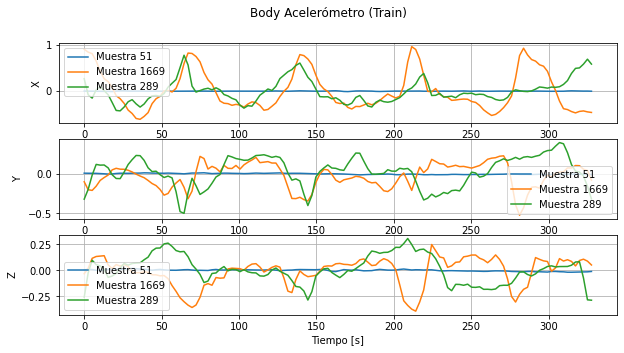

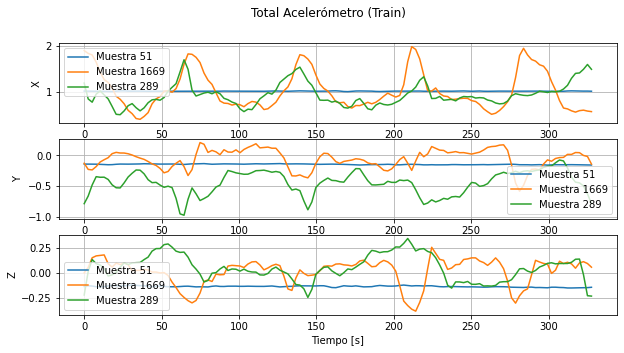

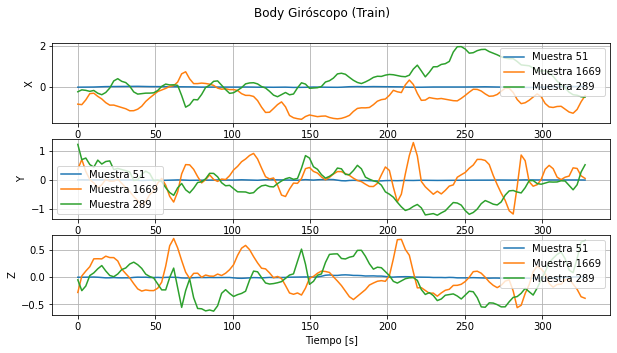

In [5]:
#Gráficos body acc entrenamiento

t=np.linspace(0,2.56*128,128)
#Crea el primer gráfico de body acelerómetro
fig, axs = plt.subplots(3, figsize=(10, 5))
fig.suptitle('Body Acelerómetro (Train)')

#Obtiene tres números aleatorios usados para gtaficar tres muestras
indice1=random.randint(0, body_acc_x_train.shape[0]-1)
indice2=random.randint(0, body_acc_x_train.shape[0]-1)
indice3=random.randint(0, body_acc_x_train.shape[0]-1)

#Primer gráfico
axs[0].plot(t,body_acc_x_train.iloc[indice1], label='Muestra '+str(indice1))
axs[0].plot(t,body_acc_x_train.iloc[indice2], label='Muestra '+str(indice2))
axs[0].plot(t,body_acc_x_train.iloc[indice3], label='Muestra '+str(indice3))
axs[1].plot(t,body_acc_y_train.iloc[indice1], label='Muestra '+str(indice1))
axs[1].plot(t,body_acc_y_train.iloc[indice2], label='Muestra '+str(indice2))
axs[1].plot(t,body_acc_y_train.iloc[indice3], label='Muestra '+str(indice3))
axs[2].plot(t,body_acc_z_train.iloc[indice1], label='Muestra '+str(indice1))
axs[2].plot(t,body_acc_z_train.iloc[indice2], label='Muestra '+str(indice2))
axs[2].plot(t,body_acc_z_train.iloc[indice3], label='Muestra '+str(indice3))

#Coloca la grilla y etiqueta en todos los gráficos
for ax in axs.flat:
    #ax.set(xlabel='Tiempo [s]', ylabel='Amplitud')
    ax.grid()
    ax.legend()
axs[2].set_xlabel('Tiempo [s]')
axs[0].set_ylabel('X')
axs[1].set_ylabel('Y')
axs[2].set_ylabel('Z')
plt.show()

#Gráficos total acc entrenamiento
fig1, axs1 = plt.subplots(3, figsize=(10, 5))
fig1.suptitle('Total Acelerómetro (Train)')
#Segundo gráfico
axs1[0].plot(t,total_acc_x_train.iloc[indice1], label='Muestra '+str(indice1))
axs1[0].plot(t,total_acc_x_train.iloc[indice2], label='Muestra '+str(indice2))
axs1[0].plot(t,total_acc_x_train.iloc[indice3], label='Muestra '+str(indice3))
axs1[1].plot(t,total_acc_y_train.iloc[indice1], label='Muestra '+str(indice1))
axs1[1].plot(t,total_acc_y_train.iloc[indice2], label='Muestra '+str(indice2))
axs1[1].plot(t,total_acc_y_train.iloc[indice3], label='Muestra '+str(indice3))
axs1[2].plot(t,total_acc_z_train.iloc[indice1], label='Muestra '+str(indice1))
axs1[2].plot(t,total_acc_z_train.iloc[indice2], label='Muestra '+str(indice2))
axs1[2].plot(t,total_acc_z_train.iloc[indice3], label='Muestra '+str(indice3))

#coloca la grilla y etiqueta
for ax in axs1.flat:
    #ax.set(xlabel='Tiempo [s]', ylabel='Amplitud')
    ax.grid()
    ax.legend()

axs1[2].set_xlabel('Tiempo [s]')
axs1[0].set_ylabel('X')
axs1[1].set_ylabel('Y')
axs1[2].set_ylabel('Z')
plt.show()

#Gráficos body gyro entrenamiento
fig2, axs2 = plt.subplots(3, figsize=(10, 5))
fig2.suptitle('Body Giróscopo (Train)')

#tercer gráfico
axs2[0].plot(t,body_gyro_x_train.iloc[indice1], label='Muestra '+str(indice1))
axs2[0].plot(t,body_gyro_x_train.iloc[indice2], label='Muestra '+str(indice2))
axs2[0].plot(t,body_gyro_x_train.iloc[indice3], label='Muestra '+str(indice3))
axs2[1].plot(t,body_gyro_y_train.iloc[indice1], label='Muestra '+str(indice1))
axs2[1].plot(t,body_gyro_y_train.iloc[indice2], label='Muestra '+str(indice2))
axs2[1].plot(t,body_gyro_y_train.iloc[indice3], label='Muestra '+str(indice3))
axs2[2].plot(t,body_gyro_z_train.iloc[indice1], label='Muestra '+str(indice1))
axs2[2].plot(t,body_gyro_z_train.iloc[indice2], label='Muestra '+str(indice2))
axs2[2].plot(t,body_gyro_z_train.iloc[indice3], label='Muestra '+str(indice3))
#Coloca la grilla y etiueta
for ax in axs2.flat:
    ax.grid()
    ax.legend()
axs2[2].set_xlabel('Tiempo [s]')
axs2[0].set_ylabel('X')
axs2[1].set_ylabel('Y')
axs2[2].set_ylabel('Z')
plt.show()



### Pre-procesamiento y gráfico de las señales 




In [6]:
#Pre-procesamiento de señales con filtro pasabajo
p1, p2 = signal.butter(10, 0.3, 'lowpass')   #Configuration filter 8 representa el orden del filtro 

#Conjunto de entrenamiento
#Body acc
p_body_acc_x_train = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_x_train))
p_body_acc_y_train = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_y_train))
p_body_acc_z_train = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_z_train)) 
#Total acc
p_total_acc_x_train = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_x_train))  
p_total_acc_y_train = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_y_train))
p_total_acc_z_train = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_z_train))   
#Body gyro
p_body_gyro_x_train = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_x_train))
p_body_gyro_y_train = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_y_train))
p_body_gyro_z_train = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_z_train))

#Conjunto de validación
#Body acc
p_body_acc_x_val = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_x_val))
p_body_acc_y_val = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_y_val))
p_body_acc_z_val = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_z_val)) 
#Total acc
p_total_acc_x_val = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_x_val))  
p_total_acc_y_val = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_y_val))
p_total_acc_z_val = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_z_val))   
#Body gyro
p_body_gyro_x_val = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_x_val))
p_body_gyro_y_val = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_y_val))
p_body_gyro_z_val = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_z_val))

#Conjunto de prueba
#Body acc
p_body_acc_x_test = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_x_test))
p_body_acc_y_test = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_y_test))
p_body_acc_z_test = pd.DataFrame(signal.filtfilt(p1, p2, body_acc_z_test)) 
#Total acc
p_total_acc_x_test = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_x_test))  
p_total_acc_y_test = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_y_test))
p_total_acc_z_test = pd.DataFrame(signal.filtfilt(p1, p2, total_acc_z_test))  
#Body gyro 
p_body_gyro_x_test = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_x_test))
p_body_gyro_y_test = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_y_test))
p_body_gyro_z_test = pd.DataFrame(signal.filtfilt(p1, p2, body_gyro_z_test))



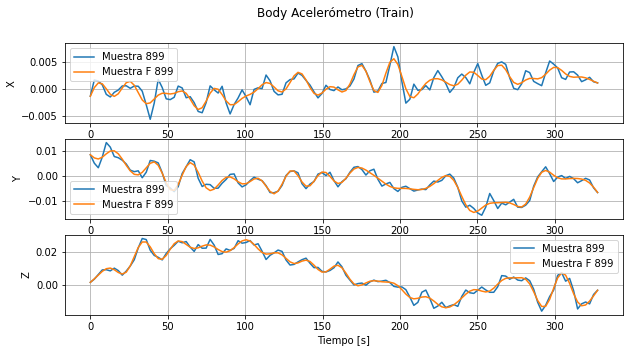

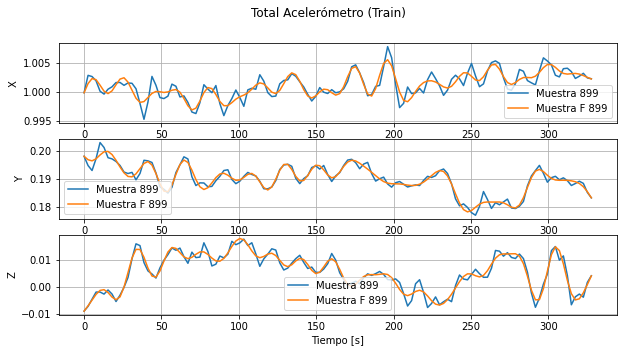

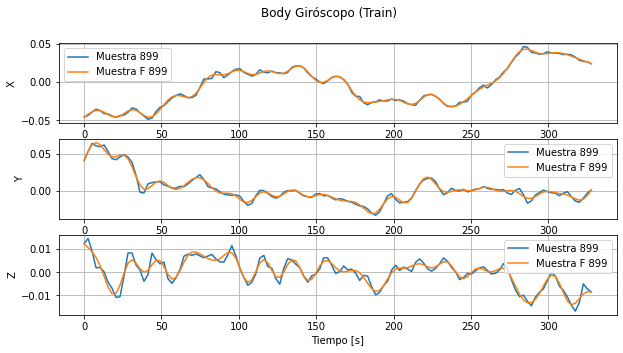

In [7]:
#Gráficos comparativos entre las señales filtradas y originales
#Gráficos body acc entrenamiento

fig3, axs3 = plt.subplots(3, figsize=(10, 5))
fig3.suptitle('Body Acelerómetro (Train)')

indice1=random.randint(0, body_acc_x_train.shape[0]-1)
#Señales originales
axs3[0].plot(t,body_acc_x_train.iloc[indice1], label='Muestra '+str(indice1))
axs3[1].plot(t,body_acc_y_train.iloc[indice1], label='Muestra '+str(indice1))
axs3[2].plot(t,body_acc_z_train.iloc[indice1], label='Muestra '+str(indice1))
#Señales filtradas
axs3[0].plot(t,p_body_acc_x_train.iloc[indice1], label='Muestra F '+str(indice1))
axs3[1].plot(t,p_body_acc_y_train.iloc[indice1], label='Muestra F '+str(indice1))
axs3[2].plot(t,p_body_acc_z_train.iloc[indice1], label='Muestra F '+str(indice1))

for ax in axs3.flat:
    #ax.set(xlabel='Tiempo [s]', ylabel='Amplitud')
    ax.grid()
    ax.legend()
axs3[2].set_xlabel('Tiempo [s]')
axs3[0].set_ylabel('X')
axs3[1].set_ylabel('Y')
axs3[2].set_ylabel('Z')
plt.show()

#Gráficos total acc entrenamiento
fig4, axs4 = plt.subplots(3, figsize=(10, 5))
fig4.suptitle('Total Acelerómetro (Train)')

#señales originales
axs4[0].plot(t,total_acc_x_train.iloc[indice1], label='Muestra '+str(indice1))
axs4[1].plot(t,total_acc_y_train.iloc[indice1], label='Muestra '+str(indice1))
axs4[2].plot(t,total_acc_z_train.iloc[indice1], label='Muestra '+str(indice1))
#señales filtradas
axs4[0].plot(t,p_total_acc_x_train.iloc[indice1], label='Muestra F '+str(indice1))
axs4[1].plot(t,p_total_acc_y_train.iloc[indice1], label='Muestra F '+str(indice1))
axs4[2].plot(t,p_total_acc_z_train.iloc[indice1], label='Muestra F '+str(indice1))

for ax in axs4.flat:
    #ax.set(xlabel='Tiempo [s]', ylabel='Amplitud')
    ax.grid()
    ax.legend()

axs4[2].set_xlabel('Tiempo [s]')
axs4[0].set_ylabel('X')
axs4[1].set_ylabel('Y')
axs4[2].set_ylabel('Z')
plt.show()

#Gráficos body gyro entrenamiento
fig5, axs5 = plt.subplots(3, figsize=(10, 5))
fig5.suptitle('Body Giróscopo (Train)')

#Señales originales
axs5[0].plot(t,body_gyro_x_train.iloc[indice1], label='Muestra '+str(indice1))
axs5[1].plot(t,body_gyro_y_train.iloc[indice1], label='Muestra '+str(indice1))
axs5[2].plot(t,body_gyro_z_train.iloc[indice1], label='Muestra '+str(indice1))
#Señales filtradas
axs5[0].plot(t,p_body_gyro_x_train.iloc[indice1], label='Muestra F '+str(indice1))
axs5[1].plot(t,p_body_gyro_y_train.iloc[indice1], label='Muestra F '+str(indice1))
axs5[2].plot(t,p_body_gyro_z_train.iloc[indice1], label='Muestra F '+str(indice1))


for ax in axs5.flat:
    ax.grid()
    ax.legend()
axs5[2].set_xlabel('Tiempo [s]')
axs5[0].set_ylabel('X')
axs5[1].set_ylabel('Y')
axs5[2].set_ylabel('Z')
plt.show()



In [8]:
#Redefinición de los datos filtrados
#Conjunto de entrenamiento
#Body acc
body_acc_x_train=p_body_acc_x_train
body_acc_y_train=p_body_acc_y_train
body_acc_z_train=p_body_acc_z_train
#Total acc
total_acc_x_train=p_total_acc_x_train
total_acc_y_train=p_total_acc_y_train
total_acc_z_train=p_total_acc_z_train
#Body gyro
body_gyro_x_train=p_body_gyro_x_train
body_gyro_y_train=p_body_gyro_y_train
body_gyro_z_train=p_body_gyro_z_train
#Conjunto de validación
#Body acc
body_acc_x_val=p_body_acc_x_val
body_acc_y_val=p_body_acc_y_val
body_acc_z_val=p_body_acc_z_val
#Body acc
total_acc_x_val=p_total_acc_x_val
total_acc_y_val=p_total_acc_y_val
total_acc_z_val=p_total_acc_z_val
body_gyro_x_val=p_body_gyro_x_val
body_gyro_y_val=p_body_gyro_y_val
body_gyro_z_val=p_body_gyro_z_val
#Conjunto de prueba
body_acc_x_test=p_body_acc_x_test
body_acc_y_test=p_body_acc_y_test
body_acc_z_test=p_body_acc_z_test
total_acc_x_test=p_total_acc_x_test
total_acc_y_test=p_total_acc_y_test
total_acc_z_test=p_total_acc_z_test
body_gyro_x_test=p_body_gyro_x_test
body_gyro_y_test=p_body_gyro_y_test
body_gyro_z_test=p_body_gyro_z_test


### Características 


In [9]:
#Características de las señales
#Entrenamiento 
#Promedio
prom_bacc_train_x=[]
prom_bacc_train_y=[]
prom_bacc_train_z=[]
prom_bgyro_train_x=[]
prom_bgyro_train_y=[]
prom_bgyro_train_z=[]
prom_tacc_train_x=[]
prom_tacc_train_y=[]
prom_tacc_train_z=[]
#Desviación estándar
std_bacc_train_x=[]
std_bacc_train_y=[]
std_bacc_train_z=[]
std_bgyro_train_x=[]
std_bgyro_train_y=[]
std_bgyro_train_z=[]
std_tacc_train_x=[]
std_tacc_train_y=[]
std_tacc_train_z=[]
#Mínimo
min_bacc_train_x=[]
min_bacc_train_y=[]
min_bacc_train_z=[]
min_bgyro_train_x=[]
min_bgyro_train_y=[]
min_bgyro_train_z=[]
min_tacc_train_x=[]
min_tacc_train_y=[]
min_tacc_train_z=[]
#Máximo
max_bacc_train_x=[]
max_bacc_train_y=[]
max_bacc_train_z=[]
max_bgyro_train_x=[]
max_bgyro_train_y=[]
max_bgyro_train_z=[]
max_tacc_train_x=[]
max_tacc_train_y=[]
max_tacc_train_z=[]

#Peak-Peak
pp_bacc_train_x=[]
pp_bacc_train_y=[]
pp_bacc_train_z=[]
pp_bgyro_train_x=[]
pp_bgyro_train_y=[]
pp_bgyro_train_z=[]
pp_tacc_train_x=[]
pp_tacc_train_y=[]
pp_tacc_train_z=[]

#MSE
MSE_bacc_train_xy=[]
MSE_bacc_train_yz=[]
MSE_bacc_train_xz=[]
MSE_bgyro_train_xy=[]
MSE_bgyro_train_yz=[]
MSE_bgyro_train_xz=[]
MSE_tacc_train_xy=[]
MSE_tacc_train_yz=[]
MSE_tacc_train_xz=[]

#Kurtosis
kurt_bacc_train_x=[]
kurt_bacc_train_y=[]
kurt_bacc_train_z=[]
kurt_bgyro_train_x=[]
kurt_bgyro_train_y=[]
kurt_bgyro_train_z=[]
kurt_tacc_train_x=[]
kurt_tacc_train_y=[]
kurt_tacc_train_z=[]

#Iqr
iqr_bacc_train_x=[]
iqr_bacc_train_y=[]
iqr_bacc_train_z=[]
iqr_tacc_train_x=[]
iqr_tacc_train_y=[]
iqr_tacc_train_z=[]
iqr_bgyro_train_x=[]
iqr_bgyro_train_y=[]
iqr_bgyro_train_z=[]

for i in range(0,body_acc_x_train.shape[0]):
  #Promedios
  prom_bacc_train_x.append(body_acc_x_train.iloc[i].mean())
  prom_bacc_train_y.append(body_acc_y_train.iloc[i].mean())
  prom_bacc_train_z.append(body_acc_z_train.iloc[i].mean())
  prom_bgyro_train_x.append(body_gyro_x_train.iloc[i].mean())
  prom_bgyro_train_y.append(body_gyro_y_train.iloc[i].mean())
  prom_bgyro_train_z.append(body_gyro_z_train.iloc[i].mean())
  prom_tacc_train_x.append(total_acc_x_train.iloc[i].mean())
  prom_tacc_train_y.append(total_acc_y_train.iloc[i].mean())
  prom_tacc_train_z.append(total_acc_z_train.iloc[i].mean())

  #Desviación estándar
  std_bacc_train_x.append(body_acc_x_train.iloc[i].std())
  std_bacc_train_y.append(body_acc_y_train.iloc[i].std())
  std_bacc_train_z.append(body_acc_z_train.iloc[i].std())
  std_bgyro_train_x.append(body_gyro_x_train.iloc[i].std())
  std_bgyro_train_y.append(body_gyro_y_train.iloc[i].std())
  std_bgyro_train_z.append(body_gyro_z_train.iloc[i].std())
  std_tacc_train_x.append(total_acc_x_train.iloc[i].std())
  std_tacc_train_y.append(total_acc_y_train.iloc[i].std())
  std_tacc_train_z.append(total_acc_z_train.iloc[i].std())

  #Mínimo
  min_bacc_train_x.append(min(body_acc_x_train.iloc[i]))
  min_bacc_train_y.append(min(body_acc_y_train.iloc[i]))
  min_bacc_train_z.append(min(body_acc_z_train.iloc[i]))
  min_bgyro_train_x.append(min(body_gyro_x_train.iloc[i]))
  min_bgyro_train_y.append(min(body_gyro_y_train.iloc[i]))
  min_bgyro_train_z.append(min(body_gyro_z_train.iloc[i]))
  min_tacc_train_x.append(min(total_acc_x_train.iloc[i]))
  min_tacc_train_y.append(min(total_acc_y_train.iloc[i]))
  min_tacc_train_z.append(min(total_acc_z_train.iloc[i]))

  #Máximo
  max_bacc_train_x.append(max(body_acc_x_train.iloc[i]))
  max_bacc_train_y.append(max(body_acc_y_train.iloc[i]))
  max_bacc_train_z.append(max(body_acc_z_train.iloc[i]))
  max_bgyro_train_x.append(max(body_gyro_x_train.iloc[i]))
  max_bgyro_train_y.append(max(body_gyro_y_train.iloc[i]))
  max_bgyro_train_z.append(max(body_gyro_z_train.iloc[i]))
  max_tacc_train_x.append(max(total_acc_x_train.iloc[i]))
  max_tacc_train_y.append(max(total_acc_y_train.iloc[i]))
  max_tacc_train_z.append(max(total_acc_z_train.iloc[i]))

  #Peak-Peak
  pp_bacc_train_x.append(max_bacc_train_x[i]-min_bacc_train_x[i])
  pp_bacc_train_y.append(max_bacc_train_y[i]-min_bacc_train_y[i])
  pp_bacc_train_z.append(max_bacc_train_z[i]-min_bacc_train_z[i])
  pp_bgyro_train_x.append(max_bgyro_train_x[i]-min_bgyro_train_x[i])
  pp_bgyro_train_y.append(max_bgyro_train_y[i]-min_bgyro_train_y[i])
  pp_bgyro_train_z.append(max_bgyro_train_z[i]-min_bgyro_train_z[i])
  pp_tacc_train_x.append(max_tacc_train_x[i]-min_tacc_train_x[i])
  pp_tacc_train_y.append(max_tacc_train_y[i]-min_tacc_train_y[i])
  pp_tacc_train_z.append(max_tacc_train_z[i]-min_tacc_train_z[i])

  #MSE
  MSE_bacc_train_xy.append(mean_squared_error(body_acc_x_train.iloc[i],body_acc_y_train.iloc[i]))
  MSE_bacc_train_yz.append(mean_squared_error(body_acc_y_train.iloc[i],body_acc_z_train.iloc[i]))
  MSE_bacc_train_xz.append(mean_squared_error(body_acc_x_train.iloc[i],body_acc_z_train.iloc[i]))
  MSE_bgyro_train_xy.append(mean_squared_error(body_gyro_x_train.iloc[i],body_gyro_y_train.iloc[i]))
  MSE_bgyro_train_yz.append(mean_squared_error(body_gyro_y_train.iloc[i],body_gyro_z_train.iloc[i]))
  MSE_bgyro_train_xz.append(mean_squared_error(body_gyro_x_train.iloc[i],body_gyro_z_train.iloc[i]))
  MSE_tacc_train_xy.append(mean_squared_error(total_acc_x_train.iloc[i],total_acc_y_train.iloc[i]))
  MSE_tacc_train_yz.append(mean_squared_error(total_acc_y_train.iloc[i],total_acc_z_train.iloc[i]))
  MSE_tacc_train_xz.append(mean_squared_error(total_acc_x_train.iloc[i],total_acc_z_train.iloc[i]))

  #Kurtosis
  kurt_bacc_train_x.append(kurtosis(body_acc_x_train.iloc[i]))
  kurt_bacc_train_y.append(kurtosis(body_acc_y_train.iloc[i]))
  kurt_bacc_train_z.append(kurtosis(body_acc_z_train.iloc[i]))
  kurt_bgyro_train_x.append(kurtosis(body_gyro_x_train.iloc[i]))
  kurt_bgyro_train_y.append(kurtosis(body_gyro_y_train.iloc[i]))
  kurt_bgyro_train_z.append(kurtosis(body_gyro_z_train.iloc[i]))
  kurt_tacc_train_x.append(kurtosis(total_acc_x_train.iloc[i]))
  kurt_tacc_train_y.append(kurtosis(total_acc_y_train.iloc[i]))
  kurt_tacc_train_z.append(kurtosis(total_acc_z_train.iloc[i]))

  #Iqr
  iqr_bacc_train_x.append(iqr(body_acc_x_train.iloc[i]))
  iqr_bacc_train_y.append(iqr(body_acc_y_train.iloc[i]))
  iqr_bacc_train_z.append(iqr(body_acc_z_train.iloc[i]))
  iqr_tacc_train_x.append(iqr(total_acc_x_train.iloc[i]))
  iqr_tacc_train_y.append(iqr(total_acc_y_train.iloc[i]))
  iqr_tacc_train_z.append(iqr(total_acc_z_train.iloc[i]))
  iqr_bgyro_train_x.append(iqr(body_gyro_x_train.iloc[i]))
  iqr_bgyro_train_y.append(iqr(body_gyro_y_train.iloc[i]))
  iqr_bgyro_train_z.append(iqr(body_gyro_z_train.iloc[i]))

  

#DataFrame de las características de todas las señales
carac_train_t=[prom_bacc_train_x, prom_bacc_train_y, prom_bacc_train_z,prom_bgyro_train_x,prom_bgyro_train_y,prom_bgyro_train_z,prom_tacc_train_x,prom_tacc_train_y,prom_tacc_train_z,
         std_bacc_train_x,std_bacc_train_y,std_bacc_train_z,std_bgyro_train_x,std_bgyro_train_y,std_bgyro_train_z,std_tacc_train_x,std_tacc_train_y,std_tacc_train_z,min_bacc_train_x,min_bacc_train_y,min_bacc_train_z,
         min_bgyro_train_x,min_bgyro_train_y,min_bgyro_train_z,min_tacc_train_x,min_tacc_train_y,min_tacc_train_z,max_bacc_train_x,max_bacc_train_y,max_bacc_train_z,max_bgyro_train_x,max_bgyro_train_y,max_bgyro_train_z,
         max_tacc_train_x,max_tacc_train_y,max_tacc_train_z,pp_bacc_train_x,pp_bacc_train_y,pp_bacc_train_z,pp_bgyro_train_x,pp_bgyro_train_y,pp_bgyro_train_z,pp_tacc_train_x,pp_tacc_train_y,pp_tacc_train_z, MSE_bacc_train_xy, MSE_bacc_train_yz, MSE_bacc_train_xz,
         MSE_bgyro_train_xy,MSE_bgyro_train_yz, MSE_bgyro_train_xz, MSE_tacc_train_xy, MSE_tacc_train_yz, MSE_tacc_train_xz, kurt_bacc_train_x, kurt_bacc_train_y, kurt_bacc_train_z,kurt_bgyro_train_x,
         kurt_bgyro_train_y,kurt_bgyro_train_z, kurt_tacc_train_x, kurt_tacc_train_y, kurt_tacc_train_z, iqr_bacc_train_x,iqr_bacc_train_y,iqr_bacc_train_z,iqr_tacc_train_x,iqr_tacc_train_y,iqr_tacc_train_z,iqr_bgyro_train_x,iqr_bgyro_train_y,iqr_bgyro_train_z
        ]
columns_name_t=['prom_bacc_x', 'prom_bacc_y', 'prom_bacc_z','prom_bgyro_x','prom_bgyro_y','prom_bgyro_z','prom_tacc_x','prom_tacc_y','prom_tacc_z',
         'std_bacc_x','std_bacc_y','std_bacc_z','std_bgyro_x','std_bgyro_y','std_bgyro_z','std_tacc_x','std_tacc_y','std_tacc_z','min_bacc_x','min_bacc_y','min_bacc_z',
         'min_bgyro_x','min_bgyro_y','min_bgyro_z','min_tacc_x','min_tacc_y','min_tacc_z','max_bacc_x','max_bacc_y','max_bacc_z','max_bgyro_x','max_bgyro_y','max_bgyro_z',
         'max_tacc_x','max_tacc_y','max_tacc_z','pp_bacc_x','pp_bacc_y','pp_bacc_z','pp_bgyro_x','pp_bgyro_y','pp_bgyro_z','pp_tacc_x','pp_tacc_y','pp_tacc_z',
          'MSE_bacc_xy', 'MSE_bacc_yz', 'MSE_bacc_xz', 'MSE_bgyro_xy','MSE_bgyro_yz', 'MSE_bgyro_xz', 'MSE_tacc_xy', 'MSE_tacc_yz', 'MSE_tacc_xz', 'kurt_bacc_x',
          'kurt_bacc_y', 'kurt_bacc_z','kurt_bgyro_x','kurt_bgyro_y', 'kurt_bgyro_z', 'kurt_tacc_x', 'kurt_tacc_y', 'kurt_tacc_z',  'iqr_bacc_x','iqr_bacc_y','iqr_bacc_z', 'iqr_tacc_x','iqr_tacc_y','iqr_tacc_z','iqr_bgyro_x','iqr_bgyro_y','iqr_bgyro_z']

carac_train2_t=np.array(carac_train_t)
data_train_t=pd.DataFrame(np.transpose(carac_train2_t), columns=columns_name_t) #Características del conjunto de entrenamiento

#DataFrame de las características de todas las señales
carac_train=[prom_bgyro_train_x,prom_bgyro_train_y,prom_bgyro_train_z,prom_tacc_train_x,prom_tacc_train_y,prom_tacc_train_z,
        std_bgyro_train_x,std_bgyro_train_y,std_bgyro_train_z,std_tacc_train_x,std_tacc_train_y,std_tacc_train_z,
         min_bgyro_train_x,min_bgyro_train_y,min_bgyro_train_z,min_tacc_train_x,min_tacc_train_y,min_tacc_train_z,max_bgyro_train_x,max_bgyro_train_y,max_bgyro_train_z,
         max_tacc_train_x,max_tacc_train_y,max_tacc_train_z,pp_bgyro_train_x,pp_bgyro_train_y,pp_bgyro_train_z,pp_tacc_train_x,pp_tacc_train_y,pp_tacc_train_z,
         MSE_bgyro_train_xy,MSE_bgyro_train_yz, MSE_bgyro_train_xz, MSE_tacc_train_xy, MSE_tacc_train_yz, MSE_tacc_train_xz,kurt_bgyro_train_x,
         kurt_bgyro_train_y,kurt_bgyro_train_z, kurt_tacc_train_x, kurt_tacc_train_y, kurt_tacc_train_z, iqr_tacc_train_x,iqr_tacc_train_y,iqr_tacc_train_z,iqr_bgyro_train_x,iqr_bgyro_train_y,iqr_bgyro_train_z
        ]
columns_name=['prom_bgyro_x','prom_bgyro_y','prom_bgyro_z','prom_tacc_x','prom_tacc_y','prom_tacc_z',
         'std_bgyro_x','std_bgyro_y','std_bgyro_z','std_tacc_x','std_tacc_y','std_tacc_z',
         'min_bgyro_x','min_bgyro_y','min_bgyro_z','min_tacc_x','min_tacc_y','min_tacc_z','max_bgyro_x','max_bgyro_y','max_bgyro_z',
         'max_tacc_x','max_tacc_y','max_tacc_z','pp_bgyro_x','pp_bgyro_y','pp_bgyro_z','pp_tacc_x','pp_tacc_y','pp_tacc_z',
           'MSE_bgyro_xy','MSE_bgyro_yz', 'MSE_bgyro_xz', 'MSE_tacc_xy', 'MSE_tacc_yz', 'MSE_tacc_xz', 
          'kurt_bgyro_x','kurt_bgyro_y', 'kurt_bgyro_z', 'kurt_tacc_x', 'kurt_tacc_y', 'kurt_tacc_z', 'iqr_tacc_x','iqr_tacc_y','iqr_tacc_z','iqr_bgyro_x','iqr_bgyro_y','iqr_bgyro_z'
        ]

carac_train2=np.array(carac_train)
data_train=pd.DataFrame(np.transpose(carac_train2), columns=columns_name) #Características del conjunto de entrenamiento con señales reducidas
data_train


,prom_bgyro_x,prom_bgyro_y,prom_bgyro_z,prom_tacc_x,prom_tacc_y,prom_tacc_z,std_bgyro_x,std_bgyro_y,std_bgyro_z,std_tacc_x,std_tacc_y,std_tacc_z,min_bgyro_x,min_bgyro_y,min_bgyro_z,min_tacc_x,min_tacc_y,min_tacc_z,max_bgyro_x,max_bgyro_y,max_bgyro_z,max_tacc_x,max_tacc_y,max_tacc_z,pp_bgyro_x,pp_bgyro_y,pp_bgyro_z,pp_tacc_x,pp_tacc_y,pp_tacc_z,MSE_bgyro_xy,MSE_bgyro_yz,MSE_bgyro_xz,MSE_tacc_xy,MSE_tacc_yz,MSE_tacc_xz,kurt_bgyro_x,kurt_bgyro_y,kurt_bgyro_z,kurt_tacc_x,kurt_tacc_y,kurt_tacc_z,iqr_tacc_x,iqr_tacc_y,iqr_tacc_z,iqr_bgyro_x,iqr_bgyro_y,iqr_bgyro_z
0,0.000345,-0.000058,0.000386,0.025098,0.901733,0.432912,0.012285,0.019030,0.004226,0.003952,0.003357,0.005537,-0.015718,-0.041535,-0.007683,0.018373,0.893636,0.423598,0.025962,0.038774,0.013283,0.034207,0.912387,0.445164,0.041681,0.080309,0.020966,0.015833,0.018751,0.021566,0.000937,0.000442,0.000140,0.768511,0.219851,0.166391,-0.823754,-0.676763,0.597654,-0.787972,0.223739,-1.027296,0.006073,0.005102,0.008879,0.018995,0.032522,0.005412
1,0.056437,0.008336,-0.013402,1.020883,-0.042984,0.106235,0.145443,0.022685,0.038564,0.003304,0.034253,0.012242,-0.225410,-0.044076,-0.100589,1.013445,-0.108607,0.076105,0.359661,0.060374,0.073364,1.029179,0.027506,0.128772,0.585071,0.104450,0.173953,0.015734,0.136113,0.052666,0.024325,0.003005,0.030611,1.133064,0.023147,0.836782,-0.920395,-0.364044,-0.410134,-0.119814,-0.796960,-0.659929,0.003764,0.047731,0.017529,0.240031,0.029254,0.047425
2,-0.391773,0.208031,0.124783,0.850865,-0.424713,-0.312629,0.414496,0.591839,0.501691,0.256321,0.179076,0.141174,-1.637694,-1.007264,-0.723224,0.374419,-0.953499,-0.690370,0.506527,1.466987,1.646731,1.451917,-0.057897,0.017454,2.144221,2.474251,2.369955,1.077498,0.895601,0.707824,0.815986,0.770513,0.755222,1.738794,0.043105,1.465359,0.328973,-0.859301,0.159996,-0.548566,-0.104538,0.283844,0.342796,0.259622,0.136212,0.520923,0.878821,0.641113
3,-0.004563,0.000699,-0.022030,0.033782,0.958208,0.294018,0.004980,0.011604,0.007192,0.002525,0.002479,0.003635,-0.013043,-0.031854,-0.034948,0.027850,0.952299,0.285859,0.014795,0.036890,-0.001662,0.039487,0.964189,0.302274,0.027837,0.068745,0.033285,0.011637,0.011889,0.016415,0.000165,0.000701,0.000348,0.854573,0.441171,0.067740,3.546995,0.491588,0.719333,-0.503164,-0.280742,-0.607473,0.003517,0.003220,0.004838,0.003952,0.019043,0.007972
4,-0.013915,-0.010196,-0.015993,0.067214,0.978764,-0.212412,0.016941,0.042271,0.028139,0.011492,0.008887,0.008725,-0.050590,-0.097792,-0.119139,0.031684,0.962860,-0.234704,0.033737,0.136672,0.039222,0.090985,1.005842,-0.187208,0.084327,0.234464,0.158361,0.059301,0.042982,0.047497,0.002418,0.003435,0.001001,0.831100,1.419154,0.078478,-0.115393,1.529061,2.718830,0.071140,0.717071,0.411411,0.017240,0.009983,0.009255,0.023462,0.040899,0.028343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,-0.005374,0.011600,-0.004929,0.968317,-0.340406,0.168779,0.013560,0.017119,0.012956,0.002588,0.006395,0.011569,-0.031691,-0.065115,-0.035198,0.959798,-0.352637,0.144913,0.029639,0.046629,0.055270,0.974369,-0.328088,0.188214,0.061330,0.111743,0.090468,0.014571,0.024549,0.043301,0.000812,0.000988,0.000211,1.712799,0.259317,0.639407,0.136267,2.110760,2.731469,0.247039,-1.161003,-1.367098,0.003074,0.010402,0.022065,0.014678,0.020686,0.014453
2796,0.008400,-0.018539,-0.003528,0.994481,-0.209073,0.093714,0.426737,0.399138,0.267516,0.249005,0.165146,0.121322,-0.932572,-0.646301,-0.537685,0.518730,-0.856637,-0.079933,0.853447,0.587359,0.520849,1.620018,0.081232,0.365074,1.786019,1.233660,1.058535,1.101289,0.937869,0.445007,0.297483,0.203830,0.243444,1.555997,0.139361,0.871711,-0.678747,-1.440827,-1.046936,-0.138587,1.205768,-0.656839,0.286906,0.205076,0.167825,0.567789,0.731669,0.443459
2797,0.000377,-0.001006,0.000541,1.001071,0.105377,0.193108,0.005138,0.005909,0.003997,0.001935,0.003708,0.004548,-0.0124

In [10]:
#Características de las señales
#Validación
#Promedio
prom_bacc_val_x=[]
prom_bacc_val_y=[]
prom_bacc_val_z=[]
prom_bgyro_val_x=[]
prom_bgyro_val_y=[]
prom_bgyro_val_z=[]
prom_tacc_val_x=[]
prom_tacc_val_y=[]
prom_tacc_val_z=[]
#Desviación estándar
std_bacc_val_x=[]
std_bacc_val_y=[]
std_bacc_val_z=[]
std_bgyro_val_x=[]
std_bgyro_val_y=[]
std_bgyro_val_z=[]
std_tacc_val_x=[]
std_tacc_val_y=[]
std_tacc_val_z=[]
#Mínimo
min_bacc_val_x=[]
min_bacc_val_y=[]
min_bacc_val_z=[]
min_bgyro_val_x=[]
min_bgyro_val_y=[]
min_bgyro_val_z=[]
min_tacc_val_x=[]
min_tacc_val_y=[]
min_tacc_val_z=[]
#Máximo
max_bacc_val_x=[]
max_bacc_val_y=[]
max_bacc_val_z=[]
max_bgyro_val_x=[]
max_bgyro_val_y=[]
max_bgyro_val_z=[]
max_tacc_val_x=[]
max_tacc_val_y=[]
max_tacc_val_z=[]

#Peak-Peak
pp_bacc_val_x=[]
pp_bacc_val_y=[]
pp_bacc_val_z=[]
pp_bgyro_val_x=[]
pp_bgyro_val_y=[]
pp_bgyro_val_z=[]
pp_tacc_val_x=[]
pp_tacc_val_y=[]
pp_tacc_val_z=[]

#MSE
MSE_bacc_val_xy=[]
MSE_bacc_val_yz=[]
MSE_bacc_val_xz=[]
MSE_bgyro_val_xy=[]
MSE_bgyro_val_yz=[]
MSE_bgyro_val_xz=[]
MSE_tacc_val_xy=[]
MSE_tacc_val_yz=[]
MSE_tacc_val_xz=[]

#Kurtosis
kurt_bacc_val_x=[]
kurt_bacc_val_y=[]
kurt_bacc_val_z=[]
kurt_bgyro_val_x=[]
kurt_bgyro_val_y=[]
kurt_bgyro_val_z=[]
kurt_tacc_val_x=[]
kurt_tacc_val_y=[]
kurt_tacc_val_z=[]

#Iqr
iqr_bacc_val_x=[]
iqr_bacc_val_y=[]
iqr_bacc_val_z=[]
iqr_tacc_val_x=[]
iqr_tacc_val_y=[]
iqr_tacc_val_z=[]
iqr_bgyro_val_x=[]
iqr_bgyro_val_y=[]
iqr_bgyro_val_z=[]


for i in range(0,body_acc_x_val.shape[0]):
  #Promedios
  prom_bacc_val_x.append(body_acc_x_val.iloc[i].mean())
  prom_bacc_val_y.append(body_acc_y_val.iloc[i].mean())
  prom_bacc_val_z.append(body_acc_z_val.iloc[i].mean())
  prom_bgyro_val_x.append(body_gyro_x_val.iloc[i].mean())
  prom_bgyro_val_y.append(body_gyro_y_val.iloc[i].mean())
  prom_bgyro_val_z.append(body_gyro_z_val.iloc[i].mean())
  prom_tacc_val_x.append(total_acc_x_val.iloc[i].mean())
  prom_tacc_val_y.append(total_acc_y_val.iloc[i].mean())
  prom_tacc_val_z.append(total_acc_z_val.iloc[i].mean())

  #Desviación estándar
  std_bacc_val_x.append(body_acc_x_val.iloc[i].std())
  std_bacc_val_y.append(body_acc_y_val.iloc[i].std())
  std_bacc_val_z.append(body_acc_z_val.iloc[i].std())
  std_bgyro_val_x.append(body_gyro_x_val.iloc[i].std())
  std_bgyro_val_y.append(body_gyro_y_val.iloc[i].std())
  std_bgyro_val_z.append(body_gyro_z_val.iloc[i].std())
  std_tacc_val_x.append(total_acc_x_val.iloc[i].std())
  std_tacc_val_y.append(total_acc_y_val.iloc[i].std())
  std_tacc_val_z.append(total_acc_z_val.iloc[i].std())

  #Mínimo
  min_bacc_val_x.append(min(body_acc_x_val.iloc[i]))
  min_bacc_val_y.append(min(body_acc_y_val.iloc[i]))
  min_bacc_val_z.append(min(body_acc_z_val.iloc[i]))
  min_bgyro_val_x.append(min(body_gyro_x_val.iloc[i]))
  min_bgyro_val_y.append(min(body_gyro_y_val.iloc[i]))
  min_bgyro_val_z.append(min(body_gyro_z_val.iloc[i]))
  min_tacc_val_x.append(min(total_acc_x_val.iloc[i]))
  min_tacc_val_y.append(min(total_acc_y_val.iloc[i]))
  min_tacc_val_z.append(min(total_acc_z_val.iloc[i]))

  #Máximo
  max_bacc_val_x.append(max(body_acc_x_val.iloc[i]))
  max_bacc_val_y.append(max(body_acc_y_val.iloc[i]))
  max_bacc_val_z.append(max(body_acc_z_val.iloc[i]))
  max_bgyro_val_x.append(max(body_gyro_x_val.iloc[i]))
  max_bgyro_val_y.append(max(body_gyro_y_val.iloc[i]))
  max_bgyro_val_z.append(max(body_gyro_z_val.iloc[i]))
  max_tacc_val_x.append(max(total_acc_x_val.iloc[i]))
  max_tacc_val_y.append(max(total_acc_y_val.iloc[i]))
  max_tacc_val_z.append(max(total_acc_z_val.iloc[i]))

  #Peak-Peak
  pp_bacc_val_x.append(max_bacc_val_x[i]-min_bacc_val_x[i])
  pp_bacc_val_y.append(max_bacc_val_y[i]-min_bacc_val_y[i])
  pp_bacc_val_z.append(max_bacc_val_z[i]-min_bacc_val_z[i])
  pp_bgyro_val_x.append(max_bgyro_val_x[i]-min_bgyro_val_x[i])
  pp_bgyro_val_y.append(max_bgyro_val_y[i]-min_bgyro_val_y[i])
  pp_bgyro_val_z.append(max_bgyro_val_z[i]-min_bgyro_val_z[i])
  pp_tacc_val_x.append(max_tacc_val_x[i]-min_tacc_val_x[i])
  pp_tacc_val_y.append(max_tacc_val_y[i]-min_tacc_val_y[i])
  pp_tacc_val_z.append(max_tacc_val_z[i]-min_tacc_val_z[i])

  #MSE
  MSE_bacc_val_xy.append(mean_squared_error(body_acc_x_val.iloc[i],body_acc_y_val.iloc[i]))
  MSE_bacc_val_yz.append(mean_squared_error(body_acc_y_val.iloc[i],body_acc_z_val.iloc[i]))
  MSE_bacc_val_xz.append(mean_squared_error(body_acc_x_val.iloc[i],body_acc_z_val.iloc[i]))
  MSE_bgyro_val_xy.append(mean_squared_error(body_gyro_x_val.iloc[i],body_gyro_y_val.iloc[i]))
  MSE_bgyro_val_yz.append(mean_squared_error(body_gyro_y_val.iloc[i],body_gyro_z_val.iloc[i]))
  MSE_bgyro_val_xz.append(mean_squared_error(body_gyro_x_val.iloc[i],body_gyro_z_val.iloc[i]))
  MSE_tacc_val_xy.append(mean_squared_error(total_acc_x_val.iloc[i],total_acc_y_val.iloc[i]))
  MSE_tacc_val_yz.append(mean_squared_error(total_acc_y_val.iloc[i],total_acc_z_val.iloc[i]))
  MSE_tacc_val_xz.append(mean_squared_error(total_acc_x_val.iloc[i],total_acc_z_val.iloc[i]))

  #Kurtosis
  kurt_bacc_val_x.append(kurtosis(body_acc_x_val.iloc[i]))
  kurt_bacc_val_y.append(kurtosis(body_acc_y_val.iloc[i]))
  kurt_bacc_val_z.append(kurtosis(body_acc_z_val.iloc[i]))
  kurt_bgyro_val_x.append(kurtosis(body_gyro_x_val.iloc[i]))
  kurt_bgyro_val_y.append(kurtosis(body_gyro_y_val.iloc[i]))
  kurt_bgyro_val_z.append(kurtosis(body_gyro_z_val.iloc[i]))
  kurt_tacc_val_x.append(kurtosis(total_acc_x_val.iloc[i]))
  kurt_tacc_val_y.append(kurtosis(total_acc_y_val.iloc[i]))
  kurt_tacc_val_z.append(kurtosis(total_acc_z_val.iloc[i]))

  #Iqr
  iqr_bacc_val_x.append(iqr(body_acc_x_val.iloc[i]))
  iqr_bacc_val_y.append(iqr(body_acc_y_val.iloc[i]))
  iqr_bacc_val_z.append(iqr(body_acc_z_val.iloc[i]))
  iqr_tacc_val_x.append(iqr(total_acc_x_val.iloc[i]))
  iqr_tacc_val_y.append(iqr(total_acc_y_val.iloc[i]))
  iqr_tacc_val_z.append(iqr(total_acc_z_val.iloc[i]))
  iqr_bgyro_val_x.append(iqr(body_gyro_x_val.iloc[i]))
  iqr_bgyro_val_y.append(iqr(body_gyro_y_val.iloc[i]))
  iqr_bgyro_val_z.append(iqr(body_gyro_z_val.iloc[i]))

#DataFrame de características con todas las señales
carac_val_t=[prom_bacc_val_x, prom_bacc_val_y, prom_bacc_val_z,prom_bgyro_val_x,prom_bgyro_val_y,prom_bgyro_val_z,prom_tacc_val_x,prom_tacc_val_y,prom_tacc_val_z,
         std_bacc_val_x,std_bacc_val_y,std_bacc_val_z,std_bgyro_val_x,std_bgyro_val_y,std_bgyro_val_z,std_tacc_val_x,std_tacc_val_y,std_tacc_val_z,min_bacc_val_x,min_bacc_val_y,min_bacc_val_z,
         min_bgyro_val_x,min_bgyro_val_y,min_bgyro_val_z,min_tacc_val_x,min_tacc_val_y,min_tacc_val_z,max_bacc_val_x,max_bacc_val_y,max_bacc_val_z,max_bgyro_val_x,max_bgyro_val_y,max_bgyro_val_z,
         max_tacc_val_x,max_tacc_val_y,max_tacc_val_z,pp_bacc_val_x,pp_bacc_val_y,pp_bacc_val_z,pp_bgyro_val_x,pp_bgyro_val_y,pp_bgyro_val_z,pp_tacc_val_x,pp_tacc_val_y,pp_tacc_val_z, MSE_bacc_val_xy, MSE_bacc_val_yz, MSE_bacc_val_xz,
         MSE_bgyro_val_xy,MSE_bgyro_val_yz, MSE_bgyro_val_xz, MSE_tacc_val_xy, MSE_tacc_val_yz, MSE_tacc_val_xz,  kurt_bacc_val_x, kurt_bacc_val_y, kurt_bacc_val_z,kurt_bgyro_val_x,
         kurt_bgyro_val_y,kurt_bgyro_val_z, kurt_tacc_val_x, kurt_tacc_val_y, kurt_tacc_val_z, iqr_bacc_val_x,iqr_bacc_val_y,iqr_bacc_val_z,iqr_tacc_val_x,iqr_tacc_val_y,iqr_tacc_val_z,iqr_bgyro_val_x,iqr_bgyro_val_y,iqr_bgyro_val_z
        ]

carac_val2_t=np.array(carac_val_t)
data_val_t=pd.DataFrame(np.transpose(carac_val2_t), columns=columns_name_t) #Características del conjunto de validación

#DataFrame de características de las señales total acc y body gyro
carac_val=[prom_bgyro_val_x,prom_bgyro_val_y,prom_bgyro_val_z,prom_tacc_val_x,prom_tacc_val_y,prom_tacc_val_z,
         std_bgyro_val_x,std_bgyro_val_y,std_bgyro_val_z,std_tacc_val_x,std_tacc_val_y,std_tacc_val_z,
         min_bgyro_val_x,min_bgyro_val_y,min_bgyro_val_z,min_tacc_val_x,min_tacc_val_y,min_tacc_val_z,max_bgyro_val_x,max_bgyro_val_y,max_bgyro_val_z,
         max_tacc_val_x,max_tacc_val_y,max_tacc_val_z,pp_bgyro_val_x,pp_bgyro_val_y,pp_bgyro_val_z,pp_tacc_val_x,pp_tacc_val_y,pp_tacc_val_z,
         MSE_bgyro_val_xy,MSE_bgyro_val_yz, MSE_bgyro_val_xz, MSE_tacc_val_xy, MSE_tacc_val_yz, MSE_tacc_val_xz, kurt_bgyro_val_x,
         kurt_bgyro_val_y,kurt_bgyro_val_z, kurt_tacc_val_x, kurt_tacc_val_y, kurt_tacc_val_z,iqr_tacc_val_x,iqr_tacc_val_y,iqr_tacc_val_z,iqr_bgyro_val_x
         ,iqr_bgyro_val_y,iqr_bgyro_val_z]

carac_val2=np.array(carac_val)
data_val=pd.DataFrame(np.transpose(carac_val2), columns=columns_name) #Características del conjunto de validación
data_val

,prom_bgyro_x,prom_bgyro_y,prom_bgyro_z,prom_tacc_x,prom_tacc_y,prom_tacc_z,std_bgyro_x,std_bgyro_y,std_bgyro_z,std_tacc_x,std_tacc_y,std_tacc_z,min_bgyro_x,min_bgyro_y,min_bgyro_z,min_tacc_x,min_tacc_y,min_tacc_z,max_bgyro_x,max_bgyro_y,max_bgyro_z,max_tacc_x,max_tacc_y,max_tacc_z,pp_bgyro_x,pp_bgyro_y,pp_bgyro_z,pp_tacc_x,pp_tacc_y,pp_tacc_z,MSE_bgyro_xy,MSE_bgyro_yz,MSE_bgyro_xz,MSE_tacc_xy,MSE_tacc_yz,MSE_tacc_xz,kurt_bgyro_x,kurt_bgyro_y,kurt_bgyro_z,kurt_tacc_x,kurt_tacc_y,kurt_tacc_z,iqr_tacc_x,iqr_tacc_y,iqr_tacc_z,iqr_bgyro_x,iqr_bgyro_y,iqr_bgyro_z
0,-0.066355,-0.011672,0.018981,1.017745,-0.240977,-0.077077,0.676268,0.362298,0.249887,0.391382,0.175943,0.107879,-1.401412,-1.624717,-0.434535,0.386063,-0.603127,-0.378318,1.004241,0.762289,0.601327,1.921402,0.106208,0.132316,2.405653,2.387006,1.035862,1.535339,0.709335,0.510633,0.864617,0.226357,0.579765,1.859683,0.061493,1.395175,-1.184386,2.199064,-0.546275,-0.799689,-0.714340,-0.190325,0.652283,0.245736,0.160833,1.212562,0.430279,0.366374
1,-0.443641,0.160777,0.081663,0.944076,-0.367843,-0.141375,0.369085,0.280379,0.257011,0.251512,0.173906,0.125467,-1.256319,-0.562738,-0.485392,0.388109,-0.806764,-0.302789,0.250461,0.715675,0.886727,1.516382,-0.091238,0.166625,1.506780,1.278413,1.372119,1.128273,0.715526,0.469414,0.554584,0.154216,0.441982,1.868180,0.086274,1.271521,-0.606795,-0.232676,0.486003,-0.235470,-0.376106,-0.596419,0.279115,0.237442,0.205564,0.527817,0.341079,0.305474
2,-0.208336,0.041521,0.058845,0.969096,-0.097867,-0.274230,0.306919,0.323690,0.246709,0.205726,0.085609,0.120654,-0.923656,-0.930413,-0.572300,0.663609,-0.447256,-0.795330,0.425414,1.254234,0.615452,1.603748,0.021608,-0.075459,1.349070,2.184647,1.187751,0.940138,0.468864,0.719870,0.267683,0.159830,0.229469,1.204322,0.044359,1.638700,-0.628790,1.976776,-0.473238,1.375163,3.402376,4.401732,0.199350,0.091093,0.093204,0.455469,0.392819,0.362097
3,-0.002089,-0.000153,0.000283,1.018367,-0.155059,0.073506,0.012333,0.003430,0.008193,0.001940,0.003370,0.004615,-0.022672,-0.008625,-0.020482,1.014604,-0.161942,0.064642,0.031381,0.009716,0.016436,1.023633,-0.146495,0.087803,0.054054,0.018342,0.036918,0.009029,0.015446,0.023162,0.000200,0.000049,0.000319,1.376943,0.052280,0.892792,0.757602,0.689307,-0.368049,-0.140889,-0.588159,0.541542,0.002536,0.004642,0.005779,0.014322,0.003647,0.011904
4,0.163733,-0.048108,-0.032854,0.994107,-0.190278,-0.140517,0.357183,0.259412,0.380894,0.226487,0.154180,0.131114,-0.679240,-0.620726,-0.699633,0.681183,-0.532983,-0.484484,0.868284,0.474923,0.653587,1.522978,0.169127,0.141709,1.547524,1.095649,1.353220,0.841795,0.702110,0.626193,0.292769,0.137779,0.498290,1.499896,0.031453,1.368707,-0.985516,-0.610817,-1.180937,-0.556936,-0.073627,-0.318072,0.336618,0.194494,0.174131,0.578979,0.364771,0.649223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.038638,0.029534,0.031557,0.985697,-0.277753,-0.157010,0.485189,0.390010,0.311128,0.236960,0.153490,0.107657,-0.832789,-0.784019,-0.693333,0.588399,-0.600521,-0.393447,0.818612,0.731723,0.435355,1.577934,-0.006259,0.109884,1.651401,1.515742,1.128689,0.989535,0.594262,0.503331,0.660576,0.191259,0.398607,1.678424,0.037805,1.382666,-1.213597,-0.626144,-0.829700,-0.498368,-0.914732,-0.411479,0.360714,0.252715,0.131290,0.815423,0.438913,0.478306
1996,-0.087259,0.025432,-0.001256,0.984183,-0.281804,-0.114993,0.637077,0.464717,0.391781,0.311718,0.182718,0.124574,-1.730781,-1.192996,-0.943699,0.577957,-0.825694,-0.430583,1.291930,0.838198,0.688485,1.758421,0.017188,0.117047,3.022710,2.031194,1.632185,1.180464,0.842882,0.547630,0.666139,0.454119,0.687479,1.789634,0.070155,1.354307,0.208642,-0.043298,-0.351278,-0.341003,0.090337,0.048568,0.415912,0.243016,0.158981,0.766674,0.537490,0.501447
1997,-0.091969,-0.010091,-0.088895,1.026420,-0.047813,-0.060106,0.063624,0.054563,0.062923,0.006030,0.0

In [11]:
#Características de las señales
#Prueba
#Promedio
prom_bacc_test_x=[]
prom_bacc_test_y=[]
prom_bacc_test_z=[]
prom_bgyro_test_x=[]
prom_bgyro_test_y=[]
prom_bgyro_test_z=[]
prom_tacc_test_x=[]
prom_tacc_test_y=[]
prom_tacc_test_z=[]
#Desviación estándar
std_bacc_test_x=[]
std_bacc_test_y=[]
std_bacc_test_z=[]
std_bgyro_test_x=[]
std_bgyro_test_y=[]
std_bgyro_test_z=[]
std_tacc_test_x=[]
std_tacc_test_y=[]
std_tacc_test_z=[]
#Mínimo
min_bacc_test_x=[]
min_bacc_test_y=[]
min_bacc_test_z=[]
min_bgyro_test_x=[]
min_bgyro_test_y=[]
min_bgyro_test_z=[]
min_tacc_test_x=[]
min_tacc_test_y=[]
min_tacc_test_z=[]
#Máximo
max_bacc_test_x=[]
max_bacc_test_y=[]
max_bacc_test_z=[]
max_bgyro_test_x=[]
max_bgyro_test_y=[]
max_bgyro_test_z=[]
max_tacc_test_x=[]
max_tacc_test_y=[]
max_tacc_test_z=[]

#Peak-Peak
pp_bacc_test_x=[]
pp_bacc_test_y=[]
pp_bacc_test_z=[]
pp_bgyro_test_x=[]
pp_bgyro_test_y=[]
pp_bgyro_test_z=[]
pp_tacc_test_x=[]
pp_tacc_test_y=[]
pp_tacc_test_z=[]

#MSE
MSE_bacc_test_xy=[]
MSE_bacc_test_yz=[]
MSE_bacc_test_xz=[]
MSE_bgyro_test_xy=[]
MSE_bgyro_test_yz=[]
MSE_bgyro_test_xz=[]
MSE_tacc_test_xy=[]
MSE_tacc_test_yz=[]
MSE_tacc_test_xz=[]

#Kurtosis
kurt_bacc_test_x=[]
kurt_bacc_test_y=[]
kurt_bacc_test_z=[]
kurt_bgyro_test_x=[]
kurt_bgyro_test_y=[]
kurt_bgyro_test_z=[]
kurt_tacc_test_x=[]
kurt_tacc_test_y=[]
kurt_tacc_test_z=[]

#Iqr
iqr_bacc_test_x=[]
iqr_bacc_test_y=[]
iqr_bacc_test_z=[]
iqr_tacc_test_x=[]
iqr_tacc_test_y=[]
iqr_tacc_test_z=[]
iqr_bgyro_test_x=[]
iqr_bgyro_test_y=[]
iqr_bgyro_test_z=[]


for i in range(0,body_acc_x_test.shape[0]):
  #Promedios
  prom_bacc_test_x.append(body_acc_x_test.iloc[i].mean())
  prom_bacc_test_y.append(body_acc_y_test.iloc[i].mean())
  prom_bacc_test_z.append(body_acc_z_test.iloc[i].mean())
  prom_bgyro_test_x.append(body_gyro_x_test.iloc[i].mean())
  prom_bgyro_test_y.append(body_gyro_y_test.iloc[i].mean())
  prom_bgyro_test_z.append(body_gyro_z_test.iloc[i].mean())
  prom_tacc_test_x.append(total_acc_x_test.iloc[i].mean())
  prom_tacc_test_y.append(total_acc_y_test.iloc[i].mean())
  prom_tacc_test_z.append(total_acc_z_test.iloc[i].mean())

  #Desviación estándar
  std_bacc_test_x.append(body_acc_x_test.iloc[i].std())
  std_bacc_test_y.append(body_acc_y_test.iloc[i].std())
  std_bacc_test_z.append(body_acc_z_test.iloc[i].std())
  std_bgyro_test_x.append(body_gyro_x_test.iloc[i].std())
  std_bgyro_test_y.append(body_gyro_y_test.iloc[i].std())
  std_bgyro_test_z.append(body_gyro_z_test.iloc[i].std())
  std_tacc_test_x.append(total_acc_x_test.iloc[i].std())
  std_tacc_test_y.append(total_acc_y_test.iloc[i].std())
  std_tacc_test_z.append(total_acc_z_test.iloc[i].std())

  #Mínimo
  min_bacc_test_x.append(min(body_acc_x_test.iloc[i]))
  min_bacc_test_y.append(min(body_acc_y_test.iloc[i]))
  min_bacc_test_z.append(min(body_acc_z_test.iloc[i]))
  min_bgyro_test_x.append(min(body_gyro_x_test.iloc[i]))
  min_bgyro_test_y.append(min(body_gyro_y_test.iloc[i]))
  min_bgyro_test_z.append(min(body_gyro_z_test.iloc[i]))
  min_tacc_test_x.append(min(total_acc_x_test.iloc[i]))
  min_tacc_test_y.append(min(total_acc_y_test.iloc[i]))
  min_tacc_test_z.append(min(total_acc_z_test.iloc[i]))

  #Máximo
  max_bacc_test_x.append(max(body_acc_x_test.iloc[i]))
  max_bacc_test_y.append(max(body_acc_y_test.iloc[i]))
  max_bacc_test_z.append(max(body_acc_z_test.iloc[i]))
  max_bgyro_test_x.append(max(body_gyro_x_test.iloc[i]))
  max_bgyro_test_y.append(max(body_gyro_y_test.iloc[i]))
  max_bgyro_test_z.append(max(body_gyro_z_test.iloc[i]))
  max_tacc_test_x.append(max(total_acc_x_test.iloc[i]))
  max_tacc_test_y.append(max(total_acc_y_test.iloc[i]))
  max_tacc_test_z.append(max(total_acc_z_test.iloc[i]))

  #Peak-Peak
  pp_bacc_test_x.append(max_bacc_test_x[i]-min_bacc_test_x[i])
  pp_bacc_test_y.append(max_bacc_test_y[i]-min_bacc_test_y[i])
  pp_bacc_test_z.append(max_bacc_test_z[i]-min_bacc_test_z[i])
  pp_bgyro_test_x.append(max_bgyro_test_x[i]-min_bgyro_test_x[i])
  pp_bgyro_test_y.append(max_bgyro_test_y[i]-min_bgyro_test_y[i])
  pp_bgyro_test_z.append(max_bgyro_test_z[i]-min_bgyro_test_z[i])
  pp_tacc_test_x.append(max_tacc_test_x[i]-min_tacc_test_x[i])
  pp_tacc_test_y.append(max_tacc_test_y[i]-min_tacc_test_y[i])
  pp_tacc_test_z.append(max_tacc_test_z[i]-min_tacc_test_z[i])

  #MSE
  MSE_bacc_test_xy.append(mean_squared_error(body_acc_x_test.iloc[i],body_acc_y_test.iloc[i]))
  MSE_bacc_test_yz.append(mean_squared_error(body_acc_y_test.iloc[i],body_acc_z_test.iloc[i]))
  MSE_bacc_test_xz.append(mean_squared_error(body_acc_x_test.iloc[i],body_acc_z_test.iloc[i]))
  MSE_bgyro_test_xy.append(mean_squared_error(body_gyro_x_test.iloc[i],body_gyro_y_test.iloc[i]))
  MSE_bgyro_test_yz.append(mean_squared_error(body_gyro_y_test.iloc[i],body_gyro_z_test.iloc[i]))
  MSE_bgyro_test_xz.append(mean_squared_error(body_gyro_x_test.iloc[i],body_gyro_z_test.iloc[i]))
  MSE_tacc_test_xy.append(mean_squared_error(total_acc_x_test.iloc[i],total_acc_y_test.iloc[i]))
  MSE_tacc_test_yz.append(mean_squared_error(total_acc_y_test.iloc[i],total_acc_z_test.iloc[i]))
  MSE_tacc_test_xz.append(mean_squared_error(total_acc_x_test.iloc[i],total_acc_z_test.iloc[i]))

  #Kurtosis
  kurt_bacc_test_x.append(kurtosis(body_acc_x_test.iloc[i]))
  kurt_bacc_test_y.append(kurtosis(body_acc_y_test.iloc[i]))
  kurt_bacc_test_z.append(kurtosis(body_acc_z_test.iloc[i]))
  kurt_bgyro_test_x.append(kurtosis(body_gyro_x_test.iloc[i]))
  kurt_bgyro_test_y.append(kurtosis(body_gyro_y_test.iloc[i]))
  kurt_bgyro_test_z.append(kurtosis(body_gyro_z_test.iloc[i]))
  kurt_tacc_test_x.append(kurtosis(total_acc_x_test.iloc[i]))
  kurt_tacc_test_y.append(kurtosis(total_acc_y_test.iloc[i]))
  kurt_tacc_test_z.append(kurtosis(total_acc_z_test.iloc[i]))

  #Iqr
  iqr_bacc_test_x.append(iqr(body_acc_x_test.iloc[i]))
  iqr_bacc_test_y.append(iqr(body_acc_y_test.iloc[i]))
  iqr_bacc_test_z.append(iqr(body_acc_z_test.iloc[i]))
  iqr_tacc_test_x.append(iqr(total_acc_x_test.iloc[i]))
  iqr_tacc_test_y.append(iqr(total_acc_y_test.iloc[i]))
  iqr_tacc_test_z.append(iqr(total_acc_z_test.iloc[i]))
  iqr_bgyro_test_x.append(iqr(body_gyro_x_test.iloc[i]))
  iqr_bgyro_test_y.append(iqr(body_gyro_y_test.iloc[i]))
  iqr_bgyro_test_z.append(iqr(body_gyro_z_test.iloc[i]))

#DataFrame de características de todas las señales
carac_test_t=[prom_bacc_test_x, prom_bacc_test_y, prom_bacc_test_z,prom_bgyro_test_x,prom_bgyro_test_y,prom_bgyro_test_z,prom_tacc_test_x,prom_tacc_test_y,prom_tacc_test_z,
         std_bacc_test_x,std_bacc_test_y,std_bacc_test_z,std_bgyro_test_x,std_bgyro_test_y,std_bgyro_test_z,std_tacc_test_x,std_tacc_test_y,std_tacc_test_z,min_bacc_test_x,min_bacc_test_y,min_bacc_test_z,
         min_bgyro_test_x,min_bgyro_test_y,min_bgyro_test_z,min_tacc_test_x,min_tacc_test_y,min_tacc_test_z,max_bacc_test_x,max_bacc_test_y,max_bacc_test_z,max_bgyro_test_x,max_bgyro_test_y,max_bgyro_test_z,
         max_tacc_test_x,max_tacc_test_y,max_tacc_test_z,pp_bacc_test_x,pp_bacc_test_y,pp_bacc_test_z,pp_bgyro_test_x,pp_bgyro_test_y,pp_bgyro_test_z,pp_tacc_test_x,pp_tacc_test_y,pp_tacc_test_z , MSE_bacc_test_xy, MSE_bacc_test_yz, MSE_bacc_test_xz,
         MSE_bgyro_test_xy,MSE_bgyro_test_yz, MSE_bgyro_test_xz, MSE_tacc_test_xy, MSE_tacc_test_yz, MSE_tacc_test_xz,  kurt_bacc_test_x, kurt_bacc_test_y, kurt_bacc_test_z,kurt_bgyro_test_x,
         kurt_bgyro_test_y,kurt_bgyro_test_z, kurt_tacc_test_x, kurt_tacc_test_y, kurt_tacc_test_z, iqr_bacc_test_x,iqr_bacc_test_y,iqr_bacc_test_z,iqr_tacc_test_x,iqr_tacc_test_y,iqr_tacc_test_z,iqr_bgyro_test_x,iqr_bgyro_test_y,iqr_bgyro_test_z
        ]

carac_test2_t=np.array(carac_test_t)
data_test_t=pd.DataFrame(np.transpose(carac_test2_t), columns=columns_name_t) #Características del conjunto de prueba

#DataFrame de características de las señales total acc y body gyro
carac_test=[prom_bgyro_test_x,prom_bgyro_test_y,prom_bgyro_test_z,prom_tacc_test_x,prom_tacc_test_y,prom_tacc_test_z,
         std_bgyro_test_x,std_bgyro_test_y,std_bgyro_test_z,std_tacc_test_x,std_tacc_test_y,std_tacc_test_z,
         min_bgyro_test_x,min_bgyro_test_y,min_bgyro_test_z,min_tacc_test_x,min_tacc_test_y,min_tacc_test_z,max_bgyro_test_x,max_bgyro_test_y,max_bgyro_test_z,
         max_tacc_test_x,max_tacc_test_y,max_tacc_test_z,pp_bgyro_test_x,pp_bgyro_test_y,pp_bgyro_test_z,pp_tacc_test_x,pp_tacc_test_y,pp_tacc_test_z ,
         MSE_bgyro_test_xy,MSE_bgyro_test_yz, MSE_bgyro_test_xz, MSE_tacc_test_xy, MSE_tacc_test_yz, MSE_tacc_test_xz,kurt_bgyro_test_x,
         kurt_bgyro_test_y,kurt_bgyro_test_z, kurt_tacc_test_x, kurt_tacc_test_y, kurt_tacc_test_z, iqr_tacc_test_x,iqr_tacc_test_y,iqr_tacc_test_z,iqr_bgyro_test_x
         ,iqr_bgyro_test_y,iqr_bgyro_test_z]


carac_test2=np.array(carac_test)
data_test=pd.DataFrame(np.transpose(carac_test2), columns=columns_name) #Características del conjunto de prueba
data_test

,prom_bgyro_x,prom_bgyro_y,prom_bgyro_z,prom_tacc_x,prom_tacc_y,prom_tacc_z,std_bgyro_x,std_bgyro_y,std_bgyro_z,std_tacc_x,std_tacc_y,std_tacc_z,min_bgyro_x,min_bgyro_y,min_bgyro_z,min_tacc_x,min_tacc_y,min_tacc_z,max_bgyro_x,max_bgyro_y,max_bgyro_z,max_tacc_x,max_tacc_y,max_tacc_z,pp_bgyro_x,pp_bgyro_y,pp_bgyro_z,pp_tacc_x,pp_tacc_y,pp_tacc_z,MSE_bgyro_xy,MSE_bgyro_yz,MSE_bgyro_xz,MSE_tacc_xy,MSE_tacc_yz,MSE_tacc_xz,kurt_bgyro_x,kurt_bgyro_y,kurt_bgyro_z,kurt_tacc_x,kurt_tacc_y,kurt_tacc_z,iqr_tacc_x,iqr_tacc_y,iqr_tacc_z,iqr_bgyro_x,iqr_bgyro_y,iqr_bgyro_z
0,0.000201,-0.007571,0.000660,0.946977,0.109432,0.367134,0.023994,0.057690,0.031266,0.015266,0.013790,0.017326,-0.097854,-0.149194,-0.050450,0.879301,0.074005,0.326392,0.038987,0.281525,0.119937,1.001528,0.146991,0.406722,0.136841,0.430719,0.170387,0.122226,0.072986,0.080331,0.005502,0.003172,0.002000,0.701899,0.066844,0.337011,3.473216,5.144341,3.637541,7.283200,0.711442,-0.099383,0.010298,0.013924,0.020485,0.024829,0.067772,0.026108
1,0.000441,-0.002690,0.000770,1.016350,0.082983,-0.111195,0.002251,0.004287,0.002694,0.001831,0.002147,0.003554,-0.005174,-0.011482,-0.004880,1.011821,0.077648,-0.119411,0.005015,0.005540,0.007271,1.020514,0.087874,-0.103197,0.010189,0.017023,0.012151,0.008694,0.010226,0.016214,0.000041,0.000050,0.000010,0.871181,0.037721,1.271377,-0.610586,-0.731263,-0.537454,-0.286660,-0.519589,-0.564551,0.002339,0.003101,0.004960,0.003208,0.005988,0.004159
2,0.167997,-0.053178,-0.040538,0.987576,-0.270226,-0.134433,0.517879,0.389399,0.302494,0.218715,0.173236,0.113472,-0.748095,-1.125414,-0.715612,0.605453,-0.683149,-0.368867,1.207911,0.651369,0.417558,1.550084,-0.010319,0.138761,1.956005,1.776783,1.133170,0.944631,0.672830,0.507628,0.754956,0.166081,0.466593,1.654308,0.051901,1.326177,-0.826392,0.318729,-0.953421,-0.420162,-0.499687,-0.275293,0.316251,0.222488,0.149767,0.812219,0.345014,0.531554
3,-0.000076,0.000136,-0.001892,-0.038074,0.978809,0.226546,0.007189,0.006670,0.005061,0.001931,0.003302,0.004613,-0.015136,-0.010245,-0.014299,-0.042369,0.970122,0.215075,0.021793,0.020203,0.006405,-0.033637,0.986611,0.235222,0.036929,0.030448,0.020704,0.008732,0.016489,0.020148,0.000033,0.000119,0.000112,1.034062,0.565939,0.070041,1.258847,0.821975,-0.637761,-0.749816,-0.259481,-0.474008,0.003076,0.004593,0.006444,0.007206,0.007958,0.007552
4,0.021702,0.011416,-0.009444,0.996084,-0.267573,-0.069521,0.607415,0.458834,0.394969,0.300761,0.184613,0.119129,-1.206341,-0.777516,-0.810295,0.406200,-0.771966,-0.312216,0.914641,0.919443,0.609886,1.586063,-0.011684,0.158188,2.120981,1.696959,1.420181,1.179863,0.760282,0.470404,0.796267,0.096546,0.610362,1.755150,0.063697,1.239359,-0.802147,-0.839691,-1.063375,-0.923026,-0.027512,-0.951953,0.484373,0.224371,0.186330,0.866587,0.652905,0.643777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.009791,-0.002221,0.004911,1.008845,-0.210561,0.077882,0.075787,0.016622,0.025098,0.003430,0.021774,0.009677,-0.220943,-0.077945,-0.064320,0.998893,-0.306357,0.049925,0.389723,0.059894,0.133194,1.019204,-0.110606,0.105604,0.610666,0.137839,0.197514,0.020310,0.195751,0.055679,0.007734,0.001721,0.003343,1.487410,0.083893,0.866817,11.517270,7.123571,9.786997,1.624987,10.198699,1.232597,0.003141,0.009577,0.011092,0.015675,0.013636,0.020509
1996,0.476136,-0.073676,0.024364,1.014526,-0.093458,0.048671,0.430911,0.384739,0.298746,0.452826,0.178471,0.107906,-0.421959,-0.793638,-0.614475,0.323751,-0.504900,-0.232695,1.603976,0.723382,0.803209,1.952049,0.455070,0.267303,2.025934,1.517020,1.417684,1.628297,0.959970,0.499999,0.546124,0.285780,0.518856,1.509549,0.052149,1.135434,-0.050025,-0.850672,-0.457756,-0.759671,0.386604,-0.519752,0.650217,0.234119,0.154410,0.524095,0.519179,0.417214
1997,-0.021390,-0.074415,0.071121,0.928711,0.167869,0.374955,0.006547,0.020758,0.017201,0.002218,0.002680,0.002998

## Selección de características


### Normalización características

In [12]:
# Normalización de las características
scaler = StandardScaler()
scaler.fit(data_train)

#Normalización conjunto de entrenamiento
train=scaler.transform(data_train)
#Normalización conjunto de validación 
val=scaler.transform(data_val)
#Normalización conjunto de prueba
test=scaler.transform(data_test)

## Gráfico de clusters


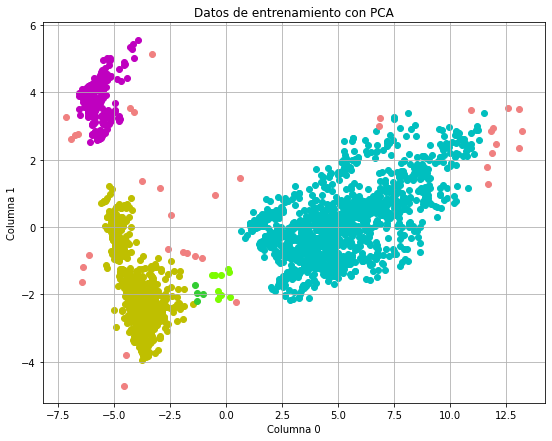

In [13]:
#Entrenamiento del PCA
pca_cluster= PCA(n_components=2).fit(train)
#Disminución dimensional de los conjuntos 
pca_train=pca_cluster.transform(train)

#DBSCAN
dbscan_cluster = DBSCAN().fit(pca_train) #Entrena el estimador a partir de los datos normalizados
pred_cluster=np.array(dbscan_cluster.labels_).astype(int) #Predicción clustering
n_clusters= set(pred_cluster)
#Gráfico de los datos 
plt.figure(figsize=(9, 7))
for i in range(0,len(pred_cluster)):
  if pred_cluster[i]==0:
    plt.scatter(pca_train[i,0],pca_train[i,1], label='Muestras PCA',color='m')
  elif pred_cluster[i]==1:
    plt.scatter(pca_train[i,0],pca_train[i,1], label='Muestras PCA',color='y')
  elif pred_cluster[i]==2:
    plt.scatter(pca_train[i,0],pca_train[i,1], label='Muestras PCA',color='c')
  elif pred_cluster[i]==3:
    plt.scatter(pca_train[i,0],pca_train[i,1], label='Muestras PCA',color='limegreen')
  elif pred_cluster[i]==4:
    plt.scatter(pca_train[i,0],pca_train[i,1], label='Muestras PCA',color='lawngreen')
  elif pred_cluster[i]==5:
    plt.scatter(pca_train[i,0],pca_train[i,1], label='Muestras PCA',color='grey')
  else:
    plt.scatter(pca_train[i,0],pca_train[i,1], label='Muestras PCA',color='lightcoral')
plt.xlabel('Columna 0')
plt.ylabel('Columna 1')
plt.title('Datos de entrenamiento con PCA')
plt.grid()
plt.show()


## Clasificador Random Forest

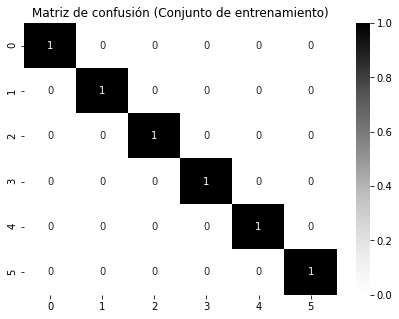

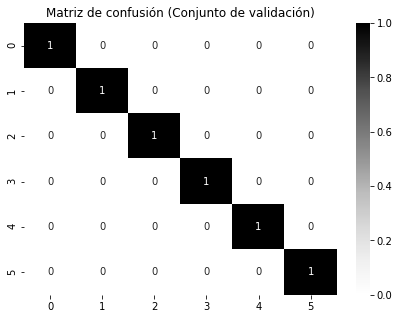

El accuracy train mediante la métrica es: 1.0
El accuracy val mediante la métrica es: 1.0


In [14]:
## Clasificador Random Forest


#Antes de crear el clasificador se emplea la función PredefinedSplit() 
indices=np.zeros(train.shape[0]+val.shape[0])
for i in range(train.shape[0]):
  indices[i]=-1
#Concatenación de los conjuntos de entrenamiento y validación
train_val=np.concatenate([train,val])
labels_train_val=np.concatenate([labels_train,labels_val])
P=PredefinedSplit(indices)

#Define el mejor valor de los parámetros
model_random=GridSearchCV(estimator=RandomForestClassifier(), param_grid={'max_depth':[17],'n_estimators':[50,100,150,200,250]}, cv=P)

#Entrena el modelo lineal 
model_random.fit(train_val, labels_train_val)

#Predicción usando el RandomForest (Conjunto de entrenamiento)
pred_train_random=model_random.predict(train) 

#Predicción usando el RandomForest (Conjunto de validación)
pred_val_random=model_random.predict(val) 

#Predicción usando el RandomForest (Conjunto de prueba)
pred_test_random=model_random.predict(test)

#Matriz de confusión (Conjunto de entrenamiento)
matriz_cf1_train = confusion_matrix(labels_train, pred_train_random, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf1_train, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de entrenamiento)')
plt.show()

#Matriz de confusión (Conjunto de validación)
matriz_cf1_val = confusion_matrix(labels_val, pred_val_random, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf1_val, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de validación)')
plt.show()

#Medición del accuracy
acc_train_random=accuracy_score(labels_train,pred_train_random, normalize=True)
print('El accuracy train mediante la métrica es: '+str(acc_train_random))
acc_val_random=accuracy_score(labels_val,pred_val_random, normalize=True)
print('El accuracy val mediante la métrica es: '+str(acc_val_random))

#-------------------------------------------------------------------------------
#Creacion del csv para subir guardar los resultados
#Creacion del csv para subir guardar los resultados
id = []
for i in range(len(pred_val_random)+1):
  if i == 0:
    id.append('Id')
  else:
    id.append(i-1)

result_random = np.array(['Category'])
result_random = np.append(result_random, pred_test_random)

archivo_random = np.array([id,result_random])
archivo_random = np.transpose(archivo_random)

myFile = open('archivo_random.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(archivo_random)

### Método SelectFromModel (Tipo wrapper)

Las características elegidas fueron: ['prom_tacc_x', 'prom_tacc_y', 'prom_tacc_z', 'std_tacc_x', 'min_tacc_x', 'min_tacc_y', 'max_tacc_x', 'max_tacc_y', 'pp_tacc_x', 'pp_tacc_y', 'MSE_tacc_xy', 'iqr_tacc_x', 'iqr_tacc_y']


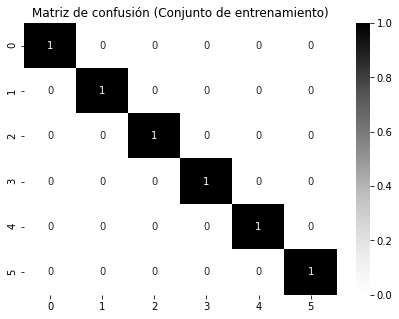

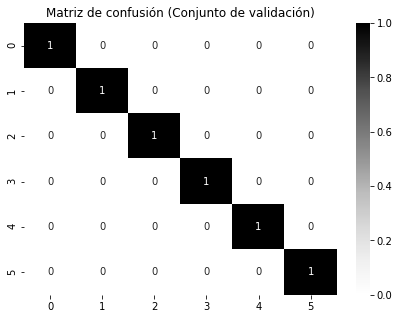

El accuracy train mediante la métrica es: 1.0
El accuracy val mediante la métrica es: 1.0


In [15]:
#Método SelectFromModel

#Entrena y encuentra las mejores características
selector_SFM = SelectFromModel(estimator=model_random.best_estimator_).fit(train, labels_train)

#Muestra si las características fueron elegidas
best_SFM=selector_SFM.get_support()

#Muestra las características elegidas
elegidas_SFM=list()
for i in range(len(columns_name)-1):
  if best_SFM[i]==True:
    elegidas_SFM.append(columns_name[i])
print('Las características elegidas fueron: '+str(elegidas_SFM))

#Primero se reducen los conjuntos sólo a las características seleccionadas
#Reduce el número de características 
train_SFM=selector_SFM.transform(train)
val_SFM=selector_SFM.transform(val)
test_SFM=selector_SFM.transform(test)

#Entrenamiento de un segundo clasificador 
#Se concatenan los conjuntos entrenamiento y val con características reducidas
train_val_SFM=np.concatenate([train_SFM,val_SFM])

#Define el mejor valor de los parámetros
model_random_SFM=GridSearchCV(estimator=RandomForestClassifier(), param_grid={'max_depth':[15],'n_estimators':[50,100,150,200,250]}, cv=P)

#Entrena el modelo lineal 
model_random_SFM.fit(train_val_SFM, labels_train_val)

#Predicción usando el RandomForest (Conjunto de entrenamiento)
pred_train_random_SFM=model_random_SFM.predict(train_SFM) 

#Predicción usando el RandomForest (Conjunto de validación)
pred_val_random_SFM=model_random_SFM.predict(val_SFM) 

#Predicción usando el RandomForest (Conjunto de prueba)
pred_test_random_SFM=model_random_SFM.predict(test_SFM)

#Matriz de confusión (Conjunto de entrenamiento)
matriz_cf2_train = confusion_matrix(labels_train, pred_train_random_SFM, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf2_train, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de entrenamiento)')
plt.show()

#Matriz de confusión (Conjunto de validación)
matriz_cf2_val = confusion_matrix(labels_val, pred_val_random_SFM, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf2_val, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de validación)')
plt.show()

#Medición del accuracy
acc_train_random_SFM=accuracy_score(labels_train,pred_train_random_SFM, normalize=True)
print('El accuracy train mediante la métrica es: '+str(acc_train_random_SFM))

acc_val_random_SFM=accuracy_score(labels_val,pred_val_random_SFM, normalize=True)
print('El accuracy val mediante la métrica es: '+str(acc_val_random_SFM))

#-------------------------------------------------------------------------------
#Creacion del csv para subir guardar los resultados
id = []
for i in range(len(pred_val_random_SFM)+1):
  if i == 0:
    id.append('Id')
  else:
    id.append(i-1)

result_random_SFM = np.array(['Category'])
result_random_SFM = np.append(result_random_SFM, pred_test_random_SFM)

archivo_random_SFM = np.array([id,result_random_SFM])
archivo_random_SFM = np.transpose(archivo_random_SFM)

myFile = open('archivo_random_SFM.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(archivo_random_SFM)

### Método SelectKBest (Tipo filtro)

Las características elegidas fueron: ['prom_tacc_x', 'std_bgyro_x', 'std_bgyro_z', 'std_tacc_x', 'std_tacc_y', 'std_tacc_z', 'min_tacc_x', 'max_tacc_x', 'pp_bgyro_x', 'pp_tacc_x', 'pp_tacc_y', 'pp_tacc_z', 'iqr_tacc_x', 'iqr_tacc_y', 'iqr_tacc_z']


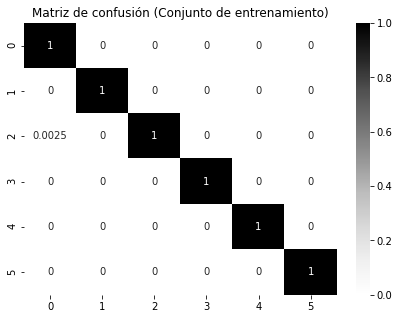

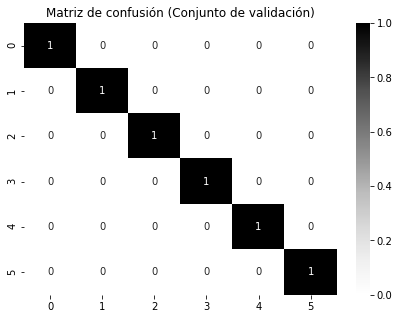

El accuracy train mediante la métrica es: 0.9996428571428572
El accuracy val mediante la métrica es: 1.0


In [16]:
# Entrena y encuentra las mejores características 
selectorK=SelectKBest(k=15).fit(train,labels_train)
#Muestra si las caracteristicas fueron elegidas
best_k=selectorK.get_support()

#Muestra las características elegidas
elegidas_K=list()
for i in range(len(columns_name)-1):
  if best_k[i]==True:
    elegidas_K.append(columns_name[i])
    #print(columns[i])
print('Las características elegidas fueron: '+str(elegidas_K))

#Reduce el número de características 
train_K=selectorK.transform(train)
val_K=selectorK.transform(val)
test_K=selectorK.transform(test)

#Se concatenan los conjuntos entrenamiento y val con características reducidas
train_val_K=np.concatenate([train_K,val_K])

#Define el mejor valor de los parámetros
model_random_K=GridSearchCV(estimator=RandomForestClassifier(), param_grid={'max_depth':[15],'n_estimators':[50,100,150,200,250]}, cv=P)

#Entrena el modelo lineal 
model_random_K.fit(train_val_K, labels_train_val)

#Predicción usando el RandomForest (Conjunto de entrenamiento)
pred_train_random_K=model_random_K.predict(train_K) 

#Predicción usando el RandomForest (Conjunto de validación)
pred_val_random_K=model_random_K.predict(val_K) 

#Predicción usando el RandomForest (Conjunto de prueba)
pred_test_random_K=model_random_K.predict(test_K)

#Matriz de confusión (Conjunto de entrenamiento)
matriz_cf3_train = confusion_matrix(labels_train, pred_train_random_K, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf3_train, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de entrenamiento)')
plt.show()

#Matriz de confusión (Conjunto de validación)
matriz_cf3_val = confusion_matrix(labels_val, pred_val_random_K, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf3_val, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de validación)')
plt.show()

#Medición del accuracy
acc_train_random_K=accuracy_score(labels_train,pred_train_random_K, normalize=True)
print('El accuracy train mediante la métrica es: '+str(acc_train_random_K))

acc_val_random_K=accuracy_score(labels_val,pred_val_random_K, normalize=True)
print('El accuracy val mediante la métrica es: '+str(acc_val_random_K))

#-------------------------------------------------------------------------------
#Creacion del csv para subir guardar los resultados
id = []
for i in range(len(pred_val_random_K)+1):
  if i == 0:
    id.append('Id')
  else:
    id.append(i-1)

result_random_K = np.array(['Category'])
result_random_K = np.append(result_random_K, pred_test_random_K)

archivo_random_K = np.array([id,result_random_K])
archivo_random_K = np.transpose(archivo_random_K)

myFile = open('archivo_random_K.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(archivo_random_K)

## Redes convolucionales (CNN) - Deep Learning

In [17]:
#Primero vamos a transformar las muestras (señales) en una matriz 
dataset_train_val=[]
dataset_test=[]

labels_train = labels_train.astype(int)
labels_val = labels_val.astype(int)
labels_train_val = labels_train_val.astype(int)

for i in range(0,body_acc_x_train.shape[0]):
  #Crea una matriz con las señales asociadas a cada muestra 
  muestras=[p_body_acc_x_train.iloc[i],p_body_acc_y_train.iloc[i],p_body_acc_z_train.iloc[i],p_total_acc_x_train.iloc[i],
                p_total_acc_y_train.iloc[i],p_total_acc_z_train.iloc[i],p_body_gyro_x_train.iloc[i],p_body_gyro_y_train.iloc[i],p_body_gyro_z_train.iloc[i]] 
  #Crea el datasets
  dataset_train_val.append({"signals":np.array(muestras).astype(np.float32), "labels":labels_train[i]-1})
  
for i in range(0,body_acc_x_val.shape[0]):
  #Crea una matriz con las señales asociadas a cada muestra 
  muestras=[p_body_acc_x_val.iloc[i],p_body_acc_y_val.iloc[i],p_body_acc_z_val.iloc[i],p_total_acc_x_val.iloc[i],
                p_total_acc_y_val.iloc[i],p_total_acc_z_val.iloc[i],p_body_gyro_x_val.iloc[i],p_body_gyro_y_val.iloc[i],p_body_gyro_z_val.iloc[i]] 
  #Crea el dataset
  dataset_train_val.append({"signals":np.array(muestras).astype(np.float32), "labels":labels_val[i]-1})

for i in range(0,body_acc_x_test.shape[0]):
  #Crea una matriz con las señales asociadas a cada muestra 
  muestras=[p_body_acc_x_test.iloc[i],p_body_acc_y_test.iloc[i],p_body_acc_z_test.iloc[i],p_total_acc_x_test.iloc[i],
                p_total_acc_y_test.iloc[i],p_total_acc_z_test.iloc[i],p_body_gyro_x_test.iloc[i],p_body_gyro_y_test.iloc[i],p_body_gyro_z_test.iloc[i]] 
  #Crea el dataset
  dataset_test.append({"signals":np.array(muestras).astype(np.float32)})

#Indices para separar los nuevos conjuntos de entrenamiento y validación
n_train = int(len(dataset_train_val)*0.85)
n_val = len(dataset_train_val) - n_train

#Se divide el conjunto de entrenamiento y validación 
dataset_train, dataset_val = random_split(dataset_train_val, [n_train, n_val])

# Crear dataloaders
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=False, num_workers=0)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=128, shuffle=False, num_workers=0)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1, shuffle=False, num_workers=0)


Época 90  Loss entrenamiento 0.08044222724856809 Loss validación 0.1869658256570498 
Entrenamiento finalizado


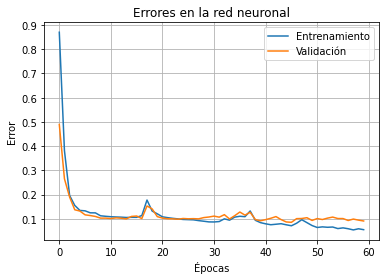

El mínimo error del conjunto de validación es: 0.097622890646259


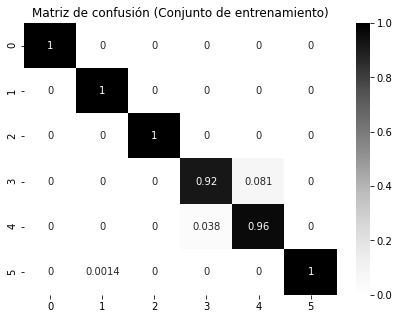

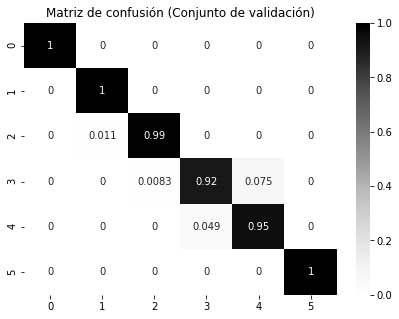

El accuracy del conjunto de entrenamiento es: 0.9789215686274509
El accuracy del conjunto de validación es: 0.975


In [18]:
# Crear modelo 
model_red = nn.Sequential(
          nn.Conv1d(9,60,kernel_size=11),  
          nn.ReLU(),
          nn.Conv1d(60,60,kernel_size=11), 
          nn.Flatten(),
          nn.Linear(6480,60),
          nn.ReLU(),
          nn.Linear(60,6)
        )


# Función de pérdidas 
device_red = torch.device('cuda')
model_red = model_red.to(device_red)
criterion_red = nn.CrossEntropyLoss()
optimizer_red = torch.optim.Adam(model_red.parameters(), lr=1e-3)

#Entrenamiento
loss1_train=np.array([]) #Almacena los errores de entrenamiento
loss1_val=np.array([]) #Almacena los errores de validación cada 50 épocas
loss11_val=np.array([]) #Almacena los errores de validación cada época

time1_0=time.time() #Hora inicial en segundos

for epoch in range(1000):
    try:
      model_red.train()

      # Train on the current epoch
      perd_train=np.array([])
      for i, data in enumerate(dataloader_train, 0):
          inputs = data["signals"].to(device_red)
          labels = data["labels"].to(device_red)
          # zero the parameter gradients
          optimizer_red.zero_grad()

          # forward + backward + optimize
          outputs = model_red(inputs)

          loss_t = criterion_red(outputs, labels)
          loss_t.backward() # Obtiene los gradientes y propaga
          optimizer_red.step() # Actualizan los pesos con los gradientes
          perd_train=np.append(perd_train,loss_t.item()) #Añade los errores a una lista
  
      prom_train=sum(perd_train)/len(perd_train)
      loss1_train=np.append(loss1_train,prom_train) 


      # Compute validation loss and accuracy for current epoch
      model_red.eval()

      if epoch%30==0:
        perd_val=np.array([]) 
      perd_val1=np.array([])  
      with torch.no_grad():
        for i, data in enumerate(dataloader_val, 0):
            inputs = data["signals"].to(device_red)
            labels = data["labels"].to(device_red)
            outputs = model_red(inputs)
            # Calcular loss de validación
            loss_v=criterion_red(outputs, labels)
            perd_val=np.append(perd_val,loss_v.item()) #Almacena datos para el promedio cada 50 épocas
            perd_val1=np.append(perd_val1,loss_v.item()) #Almacena datos para el promedio cada época


      #Promedio error de validación cada época    
      prom_val1=sum(perd_val1)/len(perd_val1)
      loss11_val=np.append(loss11_val,prom_val1)

      #Muestra los erróres
      sys.stdout.write("\rÉpoca %d  "  %(epoch) + "Loss entrenamiento %s " %(prom_train) + "Loss validación %s " %(prom_val1))

      if epoch%30==0 or epoch==999:
        #Erorres del conjunto de validación
        prom_val=sum(perd_val)/len(perd_val)
        loss1_val=np.append(loss1_val,prom_val)  

        #Guarda la red neuronal cada 30 épocas 
        torch.save(model_red, 'model_red_'+str(epoch)+'.pt')

        #Análisis de aumento en los errores de validación 
        l=len(loss1_val)
        if (loss1_val[l-1]>loss1_val[l-2]) and epoch!=0:
          epoch_break_1=epoch
          break

      # Imprimir: numero de época, loss de entrenamiento y loss de validación
      # Se debe usar sys.stdout.write() para que la línea de texto se sobreescriba en vez de imprimirse línea por línea
      # No se debe guardar checkpoints en cada época (guardarlos cada 50 épocas)

    except KeyboardInterrupt:
      print("\nEntrenamiento interrumpido")
      break

print('\nEntrenamiento finalizado')

#Gráfico de errores
t_train=np.array(range(0,epoch_break_1-30)) #Épocas de entrenamiento
t_val=np.array(range(0,epoch_break_1-30))  #Épocas de validación
plt.figure()
plt.plot(t_train,loss1_train[:epoch_break_1-30], label='Entrenamiento')
plt.plot(t_val,loss11_val[:epoch_break_1-30], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.title('Errores en la red neuronal')
plt.legend()
plt.grid()
plt.show()

#Mínimo del conjunto de validación
print('El mínimo error del conjunto de validación es: '+str(np.amin(loss1_val)))

#Cargar red neuronal entrenada cuando el error de validación es mínimo 
model_red_op=torch.load('model_red_'+str(epoch_break_1-30)+'.pt')

y_pred_train = []
y_true_train = []
y_pred_val = []
y_true_val = []
y_pred_test= []

model_red_op.eval()

with torch.no_grad():

    #Evalua en el conjunto de entrenamiento
    for i, data in enumerate(dataloader_train, 0):
        inputs = data["signals"].to(device_red)
        labels = data["labels"].to(device_red)
        outputs = model_red_op(inputs)

        outputs = (torch.max(outputs.data, 1)[1]).data.cpu().numpy()
        y_pred_train.extend(outputs) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true_train.extend(labels) # Save Truth
    
    #Evalua en el conjunto de validación
    for i, data in enumerate(dataloader_val, 0):
        inputs = data["signals"].to(device_red)
        labels = data["labels"].to(device_red)
        outputs = model_red_op(inputs)

        outputs = (torch.max(outputs.data, 1)[1]).data.cpu().numpy()
        y_pred_val.extend(outputs) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true_val.extend(labels) # Save Truth

    #Evalua en el conjunto de prueba
    for i, data in enumerate(dataloader_test, 0):
        inputs = data["signals"].to(device_red)
        outputs = model_red_op(inputs)

        outputs = (torch.max(outputs.data, 1)[1]).data.cpu().numpy()
        y_pred_test.extend(outputs) # Save Prediction

#Matriz de confusión (Conjunto de entrenamiento)
matriz_cf4_train = confusion_matrix(y_true_train, y_pred_train, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf4_train, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de entrenamiento)')
plt.show()

#Matriz de confusión (Conjunto de validación)
matriz_cf4_val = confusion_matrix(y_true_val, y_pred_val, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf4_val, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de validación)')
plt.show()


#Accuracy conjunto de entrenamiento
accuracy_red_train=accuracy_score(y_true_train,y_pred_train, normalize=True)
print('El accuracy del conjunto de entrenamiento es: '+str(accuracy_red_train))

#Accuracy conjunto de validación
accuracy_red_val=accuracy_score(y_true_val,y_pred_val, normalize=True)
print('El accuracy del conjunto de validación es: '+str(accuracy_red_val))

#-------------------------------------------------------------------------------
#Creacion del csv para subir guardar los resultados
id = []
for i in range(len(y_pred_test)+1):
  if i == 0:
    id.append('Id')
  else:
    id.append(i-1)

for i in range(len(y_pred_test)):
  y_pred_test[i]=y_pred_test[i]+1

result_red = np.array(['Category'])
result_red = np.append(result_red, y_pred_test)

archivo_red = np.array([id,result_red])
archivo_red = np.transpose(archivo_red)

myFile = open('archivo_red.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(archivo_red)


### Red neuronal lineal a partir de las características

In [19]:
#Primero vamos a transformar las muestras (señales) en una matriz 

labels_train_2 = labels_train.astype(int)
labels_val_2 = labels_val.astype(int)
labels_train_val_2=labels_train_val.astype(int)

carac_train_val_2=train_val.astype(np.float32)
carac_test_2 = test.astype(np.float32)
dataset_train_val_2 = [ {"features":carac_train_val_2[i,:], "labels":labels_train_val_2[i]-1} for i in range(carac_train_val_2.shape[0])]
dataset_test_2 = [ {"features":carac_test_2[i,:]} for i in range(carac_test_2.shape[0])]

#Indices para separar los nuevos conjuntos de entrenamiento y validación
n_train_2 = int(len(dataset_train_val_2)*0.85)
n_val_2 = len(dataset_train_val_2) - n_train_2

#Se divide el conjunto de entrenamiento y validación 
dataset_train_2, dataset_val_2 = random_split(dataset_train_val_2, [n_train_2, n_val_2])

# Crear dataloaders
dataloader_train_2 = torch.utils.data.DataLoader(dataset_train_2, batch_size=128, shuffle=False, num_workers=0)
dataloader_val_2 = torch.utils.data.DataLoader(dataset_val_2, batch_size=128, shuffle=False, num_workers=0)
dataloader_test_2 = torch.utils.data.DataLoader(dataset_test_2, batch_size=1, shuffle=False, num_workers=0)


Época 150  Loss entrenamiento 0.07096411094244104 Loss validación 0.22640513504544893 
Entrenamiento finalizado


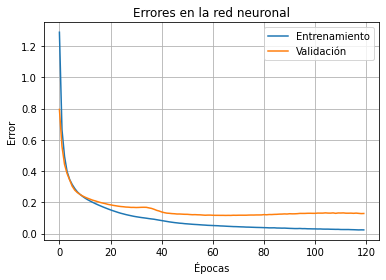

El mínimo error del conjunto de validación es: 0.097622890646259


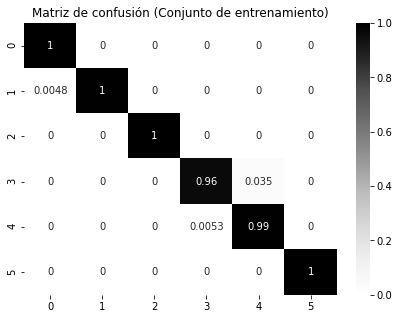

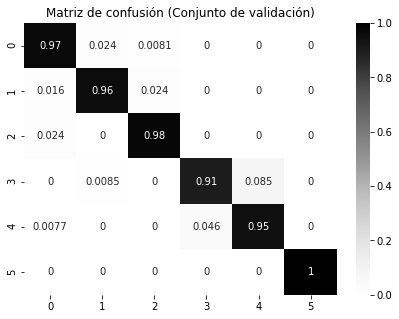

El accuracy del conjunto de entrenamiento es: 0.9921568627450981
El accuracy del conjunto de validación es: 0.9597222222222223


In [20]:
n_entradas=train_val.shape[1]
# Crear modelo 
model_red2 = nn.Sequential(
          nn.Linear(n_entradas,100),
          nn.ReLU(),
          nn.Linear(100,100),
          nn.ReLU(),
          nn.Linear(100,6)
        )


# Función de pérdidas 
device_red2 = torch.device('cuda')
model_red2 = model_red2.to(device_red2)
criterion_red2 = nn.CrossEntropyLoss()
optimizer_red2 = torch.optim.Adam(model_red2.parameters(), lr=1e-3)

#Entrenamiento
loss1_train2=np.array([]) #Almacena los errores de entrenamiento
loss1_val2=np.array([]) #Almacena los errores de validación cada 20 épocas
loss11_val2=np.array([]) #Almacena los errores de validación cada época

time1_0=time.time() #Hora inicial en segundos

for epoch in range(1000):
    try:
      model_red2.train()

      # Train on the current epoch
      perd_train=np.array([])
      for i, data in enumerate(dataloader_train_2, 0):
          inputs = data["features"].to(device_red2)
          labels = data["labels"].to(device_red2)
          # zero the parameter gradients
          optimizer_red2.zero_grad()

          # forward + backward + optimize
          outputs = model_red2(inputs)

          loss_t = criterion_red2(outputs, labels)
          loss_t.backward() # Obtiene los gradientes y propaga
          optimizer_red2.step() # Actualizan los pesos con los gradientes
          perd_train=np.append(perd_train,loss_t.item()) #Añade los errores a una lista
  
      prom_train=sum(perd_train)/len(perd_train)
      loss1_train2=np.append(loss1_train2,prom_train) 


      # Compute validation loss and accuracy for current epoch
      model_red2.eval()

      if epoch%30==0:
        perd_val=np.array([]) 
      perd_val1=np.array([])  
      with torch.no_grad():
        for i, data in enumerate(dataloader_val_2, 0):
            inputs = data["features"].to(device_red2)
            labels = data["labels"].to(device_red2)
            outputs = model_red2(inputs)
            # Calcular loss de validación
            loss_v=criterion_red2(outputs, labels)
            perd_val=np.append(perd_val,loss_v.item()) #Almacena datos para el promedio cada 50 épocas
            perd_val1=np.append(perd_val1,loss_v.item()) #Almacena datos para el promedio cada época


      #Promedio error de validación cada época    
      prom_val1=sum(perd_val1)/len(perd_val1)
      loss11_val2=np.append(loss11_val2,prom_val1)

      #Muestra los erróres
      sys.stdout.write("\rÉpoca %d  "  %(epoch) + "Loss entrenamiento %s " %(prom_train) + "Loss validación %s " %(prom_val1))

      if epoch%30==0 or epoch==999:
        #Erorres del conjunto de validación
        prom_val=sum(perd_val)/len(perd_val)
        loss1_val2=np.append(loss1_val,prom_val)  

        #Guarda la red neuronal cada 30 épocas 
        torch.save(model_red2, 'model_red2_'+str(epoch)+'.pt')

        #Análisis de aumento en los errores de validación 
        l=len(loss1_val2)
        if (loss1_val2[l-1]>loss1_val2[l-2]) and epoch>30:
           epoch_break_2=epoch
           break

      # Imprimir: numero de época, loss de entrenamiento y loss de validación
      # Se debe usar sys.stdout.write() para que la línea de texto se sobreescriba en vez de imprimirse línea por línea
      # No se debe guardar checkpoints en cada época (guardarlos cada 50 épocas)

    except KeyboardInterrupt:
      print("\nEntrenamiento interrumpido")
      break

print('\nEntrenamiento finalizado')

#Gráfico de errores
t_train=np.array(range(0,epoch_break_2-30)) #Épocas de entrenamiento
t_val=np.array(range(0,epoch_break_2-30))  #Épocas de validación
plt.figure()
plt.plot(t_train,loss1_train2[:epoch_break_2-30], label='Entrenamiento')
plt.plot(t_val,loss11_val2[:epoch_break_2-30], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.title('Errores en la red neuronal')
plt.legend()
plt.grid()
plt.show()

#Mínimo del conjunto de validación
print('El mínimo error del conjunto de validación es: '+str(np.amin(loss1_val2)))

#Cargar red neuronal entrenada cuando el error de validación es mínimo 
model_red_op_2=torch.load('model_red2_'+str(epoch_break_2-30)+'.pt')

y_pred_train_2 = []
y_true_train_2 = []
y_pred_val_2 = []
y_true_val_2 = []
y_pred_test_2= []

model_red_op_2.eval()

with torch.no_grad():

    #Evalua en el conjunto de entrenamiento
    for i, data in enumerate(dataloader_train_2, 0):
        inputs = data["features"].to(device_red2)
        labels = data["labels"].to(device_red2)
        outputs = model_red_op_2(inputs)

        outputs = (torch.max(outputs.data, 1)[1]).data.cpu().numpy()
        y_pred_train_2.extend(outputs) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true_train_2.extend(labels) # Save Truth
    
    #Evalua en el conjunto de validación
    for i, data in enumerate(dataloader_val_2, 0):
        inputs = data["features"].to(device_red2)
        labels = data["labels"].to(device_red2)
        outputs = model_red_op_2(inputs)

        outputs = (torch.max(outputs.data, 1)[1]).data.cpu().numpy()
        y_pred_val_2.extend(outputs) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true_val_2.extend(labels) # Save Truth

    #Evalua en el conjunto de prueba
    for i, data in enumerate(dataloader_test_2, 0):
        inputs = data["features"].to(device_red2)
        outputs = model_red_op_2(inputs)

        outputs = (torch.max(outputs.data, 1)[1]).data.cpu().numpy()
        y_pred_test_2.extend(outputs) # Save Prediction

#Matriz de confusión (Conjunto de entrenamiento)
matriz_cf5_train = confusion_matrix(y_true_train_2, y_pred_train_2, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf5_train, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de entrenamiento)')
plt.show()

#Matriz de confusión (Conjunto de validación)
matriz_cf5_val = confusion_matrix(y_true_val_2, y_pred_val_2, normalize='true')
plt.figure(figsize=(7, 5))
sb.heatmap(matriz_cf5_val, annot=True, cmap='Greys')
plt.title('Matriz de confusión (Conjunto de validación)')
plt.show()

#Accuracy conjunto de entrenamiento
accuracy_red_train_2=accuracy_score(y_true_train_2,y_pred_train_2, normalize=True)
print('El accuracy del conjunto de entrenamiento es: '+str(accuracy_red_train_2))

#Accuracy conjunto de validación
accuracy_red_val_2=accuracy_score(y_true_val_2,y_pred_val_2, normalize=True)
print('El accuracy del conjunto de validación es: '+str(accuracy_red_val_2))

#-------------------------------------------------------------------------------
#Creacion del csv para subir guardar los resultados
id = []
for i in range(len(y_pred_test_2)+1):
  if i == 0:
    id.append('Id')
  else:
    id.append(i-1)

for i in range(len(y_pred_test_2)):
  y_pred_test_2[i]=y_pred_test_2[i]+1

result_red_2 = np.array(['Category'])
result_red_2 = np.append(result_red, y_pred_test_2)

archivo_red_2 = np.array([id,result_red])
archivo_red_2 = np.transpose(archivo_red_2)

myFile = open('archivo_red_2.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(archivo_red)

